In [1]:
import requests
import pandas as pd
import json
from bokeh.plotting import figure, output_notebook, show, save, output_file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima_model import ARIMA
from scipy.signal import lfilter


%matplotlib inline

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
r = requests.get('https://www.openhumans.org/api/public-data/?source=fitbit')

In [3]:
with open('fitbit-data-3.json') as json_data:        #Open json file containing the data
    fit_data_0 = json.load(json_data)
    

In [4]:
fit_data_0.keys()

dict_keys(['sleep-minutes', 'awake-minutes', 'sleep-start-time', 'profile', 'activities-overview', 'minutes-to-sleep', 'weight-log', 'sleep-awakenings', 'heart', 'tracker-minutes-fairly-active', 'sleep-minutes-after-wakeup', 'tracker-minutes-very-active', 'tracker-minutes-sedentary', 'time-in-bed', 'sleep-efficiency', 'tracker-steps', 'tracker-calories', 'tracker-distance', 'tracker-activity-calories', 'tracker-elevation', 'tracker-floors', 'weight', 'tracker-minutes-lightly-active'])

In [5]:
fit_data_0['profile']

{'averageDailySteps': 0,
 'encodedId': '265VRZ',
 'height': 64.01574803149606,
 'memberSince': '2013-06-17',
 'strideLengthRunning': 43.503937007874015,
 'strideLengthWalking': 26.5748031496063,
 'weight': 142.3}

In [6]:
#####Data for Weight and Minutes active #####################################################

In [7]:
#Get data for years 2013 through 2017 for activity

min_light_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2013']['activities-tracker-minutesLightlyActive'])
min_light_active_2013['dateTime'] = pd.to_datetime(min_light_active_2013['dateTime'])
min_light_active_2013.columns = ['date','light_minutes']
min_light_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2014']['activities-tracker-minutesLightlyActive'])
min_light_active_2014['dateTime'] = pd.to_datetime(min_light_active_2014['dateTime'])
min_light_active_2014.columns = ['date','light_minutes']
min_light_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2015']['activities-tracker-minutesLightlyActive'])
min_light_active_2015['dateTime'] = pd.to_datetime(min_light_active_2015['dateTime'])
min_light_active_2015.columns = ['date','light_minutes']
min_light_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2016']['activities-tracker-minutesLightlyActive'])
min_light_active_2016['dateTime'] = pd.to_datetime(min_light_active_2016['dateTime'])
min_light_active_2016.columns = ['date','light_minutes']
min_light_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2017']['activities-tracker-minutesLightlyActive'])
min_light_active_2017['dateTime'] = pd.to_datetime(min_light_active_2017['dateTime'])
min_light_active_2017.columns = ['date','light_minutes']

In [8]:
#concatenate to make one DataFrame for lighly active minutes 

min_light_active = pd.concat([min_light_active_2013,min_light_active_2014,min_light_active_2015,min_light_active_2016,min_light_active_2017])
#min_light_active = min_light_active.set_index('date')
min_light_active['light_minutes'] = min_light_active['light_minutes'].astype(int)



In [9]:
#Repeat steps for fairly active minutes

min_fairly_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2013']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2013['dateTime'] = pd.to_datetime(min_fairly_active_2013['dateTime'])
min_fairly_active_2013.columns = ['date','fair_minutes']
min_fairly_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2014']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2014['dateTime'] = pd.to_datetime(min_fairly_active_2014['dateTime'])
min_fairly_active_2014.columns = ['date','fair_minutes']
min_fairly_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2015']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2015['dateTime'] = pd.to_datetime(min_fairly_active_2015['dateTime'])
min_fairly_active_2015.columns = ['date','fair_minutes']
min_fairly_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2016']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2016['dateTime'] = pd.to_datetime(min_fairly_active_2016['dateTime'])
min_fairly_active_2016.columns = ['date','fair_minutes']
min_fairly_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2017']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2017['dateTime'] = pd.to_datetime(min_fairly_active_2017['dateTime'])
min_fairly_active_2017.columns = ['date','fair_minutes']


In [10]:
min_fairly_active = pd.concat([min_fairly_active_2013,min_fairly_active_2014,min_fairly_active_2015,min_fairly_active_2016,min_fairly_active_2017])
#min_fairly_active = min_fairly_active.set_index('date')
min_fairly_active['fair_minutes'] = min_fairly_active['fair_minutes'].astype(int)
min_fairly_active = min_fairly_active.drop('date',axis=1)





In [11]:
#Repeat steps for very active minutes


min_very_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2013']['activities-tracker-minutesVeryActive'])
min_very_active_2013['dateTime'] = pd.to_datetime(min_very_active_2013['dateTime'])
min_very_active_2013.columns = ['date','very_minutes']
min_very_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2014']['activities-tracker-minutesVeryActive'])
min_very_active_2014['dateTime'] = pd.to_datetime(min_very_active_2014['dateTime'])
min_very_active_2014.columns = ['date','very_minutes']
min_very_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2015']['activities-tracker-minutesVeryActive'])
min_very_active_2015['dateTime'] = pd.to_datetime(min_very_active_2015['dateTime'])
min_very_active_2015.columns = ['date','very_minutes']
min_very_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2016']['activities-tracker-minutesVeryActive'])
min_very_active_2016['dateTime'] = pd.to_datetime(min_very_active_2016['dateTime'])
min_very_active_2016.columns = ['date','very_minutes']
min_very_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2017']['activities-tracker-minutesVeryActive'])
min_very_active_2017['dateTime'] = pd.to_datetime(min_very_active_2017['dateTime'])
min_very_active_2017.columns = ['date','very_minutes']

In [12]:
min_very_active = pd.concat([min_very_active_2013, min_very_active_2014,min_very_active_2015,min_very_active_2016,min_very_active_2017])
#min_very_active = min_very_active.set_index('date')
min_very_active['very_minutes'] = min_very_active['very_minutes'].astype(int)
min_very_active = min_very_active.drop('date',axis=1)


In [13]:
#Combine all above minutes, make new colum for Total active minutes and a ratio
#Set index to datetime

min_active_total = pd.concat([min_light_active, min_fairly_active, min_very_active], axis=1)
min_active_total['Total_minutes'] = min_active_total['light_minutes']+min_active_total['fair_minutes']+min_active_total['very_minutes']
min_active_total['Percent Very Active'] = (min_active_total['very_minutes']/min_active_total['Total_minutes'])
#min_active_total = min_active_total.reset_index()

In [14]:
min_active_total = min_active_total.reset_index(drop=True)
min_active_total = min_active_total[183:1308]
min_active_total_date = min_active_total.set_index('date')
min_active_total_date

light_minutes  fair_minutes  very_minutes  Total_minutes  \
date                                                                   
2013-07-03            126            45             3            174   
2013-07-04             88            37             0            125   
2013-07-05             11             7             0             18   
2013-07-06            105            40             5            150   
2013-07-07            148            44             0            192   
2013-07-08            184            59             1            244   
2013-07-09             78            23             0            101   
2013-07-10            111            31             0            142   
2013-07-11            133            55             2            190   
2013-07-12             97            32             0            129   
2013-07-13             97            21             0            118   
2013-07-14            125            40             0            165   
2013-07-15            145            36             0            181   
2013-07-16            205            53             1            259   
2013-07-17            150            56            11            217   
2013-07-18            121            74            30            225   
2013-07-19            116            18             0            134   
2013-07-20            186            46             0            232   
2013-07-21            157            52             4            213   
2013-07-22            131            42             0            173   
2013-07-23            177            24             1            202   
2013-07-24            100            35             0            135   
2013-07-25            125            26             0            151   
2013-07-26            121            28             0            149   
2013-07-27             68            15             0             83   
2013-07-28            189            60             1            250   
2013-07-29             92            24             0            116   
2013-07-30             81            30             0            111   
2013-07-31             82            36             2            120   
2013-08-01            104            22             0            126   
...                   ...           ...           ...            ...   
2016-07-02            123             0             0            123   
2016-07-03            106             0             0            106   
2016-07-04             93             0             0             93   
2016-07-05            102             0             0            102   
2016-07-06            154             0             0            154   
2016-07-07            108             0             0            108   
2016-07-08            121             0             0            121   
2016-07-09             96             0             0             96   
2016-07-10            170             0             0            170   
2016-07-11            172             0             0            172   
2016-07-12            110             6             1            117   
2016-07-13            151             0             0            151   
2016-07-14             62             0             0             62   
2016-07-15            176             0             0            176   
2016-07-16            151             0             0            151   
2016-07-17            150            38            19            207   
2016-07-18            214             0             0            214   
2016-07-19            141             0             0            141   
2016-07-20            160             0             0            160   
2016-07-21            150             0             0            150   
2016-07-22            134             0             0            134   
2016-07-23             90             0             0             90   
2016-07-24              0             0             

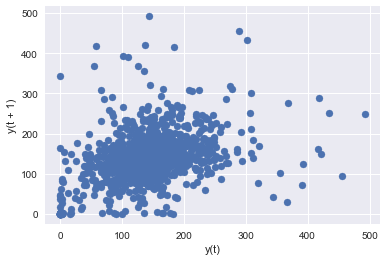

In [15]:
#Lag plot for time series data of total minutes

from pandas.plotting import lag_plot
lag_plot(min_active_total_date['Total_minutes'])
plt.show()

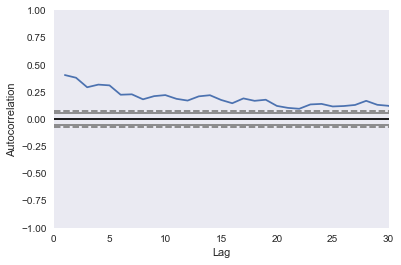

In [16]:
#Autocorrelation plot for total minutes data

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(min_active_total_date['Total_minutes'])
plt.xlim(0,30)
plt.show()

In [17]:
#Now get weight data into a DataFrame:

In [18]:
df_weight = pd.DataFrame()
for key in fit_data_0['weight-log']:
    data = pd.DataFrame(fit_data_0['weight-log'][key]['weight'])
    df_weight = df_weight.append(data)

In [19]:
df_weight['date']= pd.to_datetime(df_weight['date'])

In [20]:
df_weight = df_weight.sort_values(by='date')
df_weight = df_weight.drop_duplicates(subset='date', keep='last')
df_weight = df_weight.reset_index(drop=True)


In [21]:
df_weight_red = df_weight.loc[8:809]
df_weight_red = df_weight_red.reset_index(drop=True)
df_weight_red_date = df_weight_red.set_index('date')

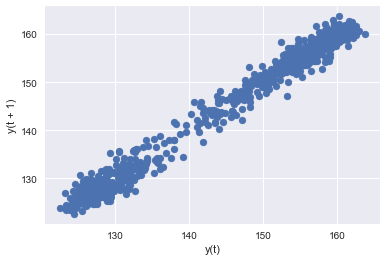

In [22]:
#Lag plot for weight data 

lag_plot(df_weight_red_date['weight'])
plt.show()

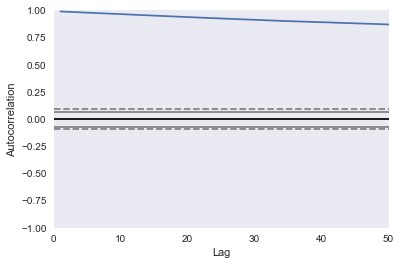

In [23]:
#Autocorrelation for weight data: not a stationary time series

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_weight_red_date['weight'])
plt.xlim(0,50)
plt.show()

In [24]:
#Combine weight and activity data into one DataFrame

In [25]:
df_weight_active = pd.concat([df_weight_red_date,min_active_total_date],axis=1)
df_weight_active = df_weight_active.dropna()

In [26]:
#Calculate rolling averages for a 7 day period to smooth out the time series

df_weight_active['Rolling Avg Activity'] = df_weight_active['Total_minutes'].rolling(window=7).mean()
df_weight_active['Rolling Avg Weight'] = df_weight_active['weight'].rolling(window=7).mean()

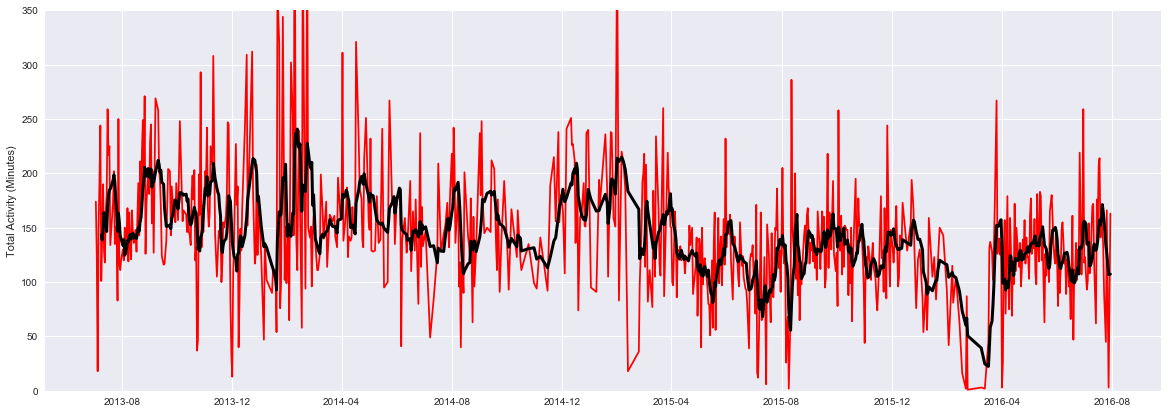

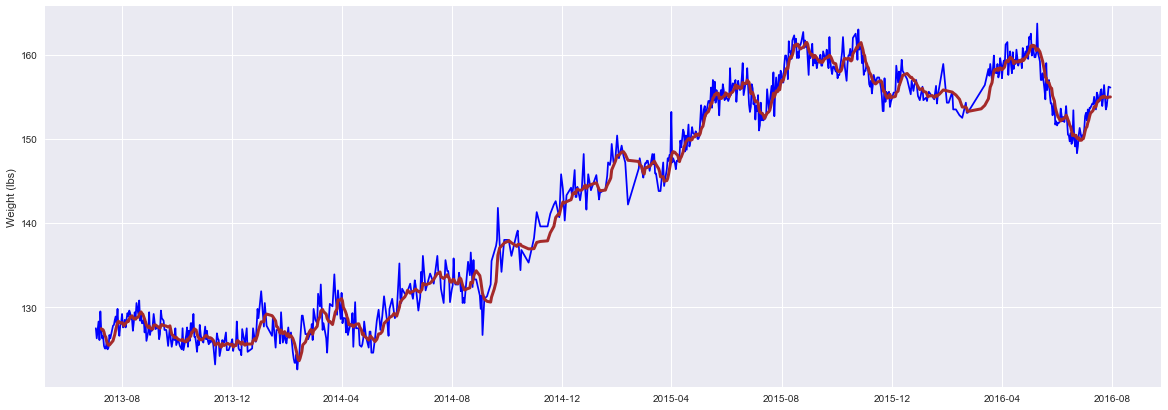

In [27]:
#Plots of data and the rolling averages

fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Total_minutes'],'r')
plot2 = ax1.plot(df_weight_active.index,df_weight_active['Rolling Avg Activity'], 'black',linewidth=3.0)
plt.ylabel('Total Activity (Minutes)')
plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['weight'],'b')
plot4 = ax2.plot(df_weight_active.index,df_weight_active['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')


In [28]:
df_weight_active['Rolling Change Activity'] = df_weight_active['Rolling Avg Activity'].pct_change(15)
df_weight_active['Rolling Change Weight'] = df_weight_active['Rolling Avg Weight'].pct_change(15)

In [29]:
#for i in range(-7,7,1):
 #   print('shift day:', i, df_weight_active['Rolling Change Weight'].corr(df_weight_active['Rolling Change Activity'].shift(i)))

In [30]:
#Correlation between total activity and weight, with various time lags 

for i in range(0,20,1):
    print('shift day:', i, df_weight_active['Rolling Avg Activity'].corr(df_weight_active['Rolling Avg Weight'].shift(i)))  

shift day: 0 -0.577347717488
shift day: 1 -0.577134057862
shift day: 2 -0.577505266496
shift day: 3 -0.57742711017
shift day: 4 -0.577528792696
shift day: 5 -0.578015106682
shift day: 6 -0.578412759632
shift day: 7 -0.579224213541
shift day: 8 -0.578811583119
shift day: 9 -0.577877331683
shift day: 10 -0.576674942466
shift day: 11 -0.574735223462
shift day: 12 -0.572524444983
shift day: 13 -0.570019459521
shift day: 14 -0.567410315289
shift day: 15 -0.565043062908
shift day: 16 -0.563162813545
shift day: 17 -0.562349014904
shift day: 18 -0.561459950842
shift day: 19 -0.56099929356


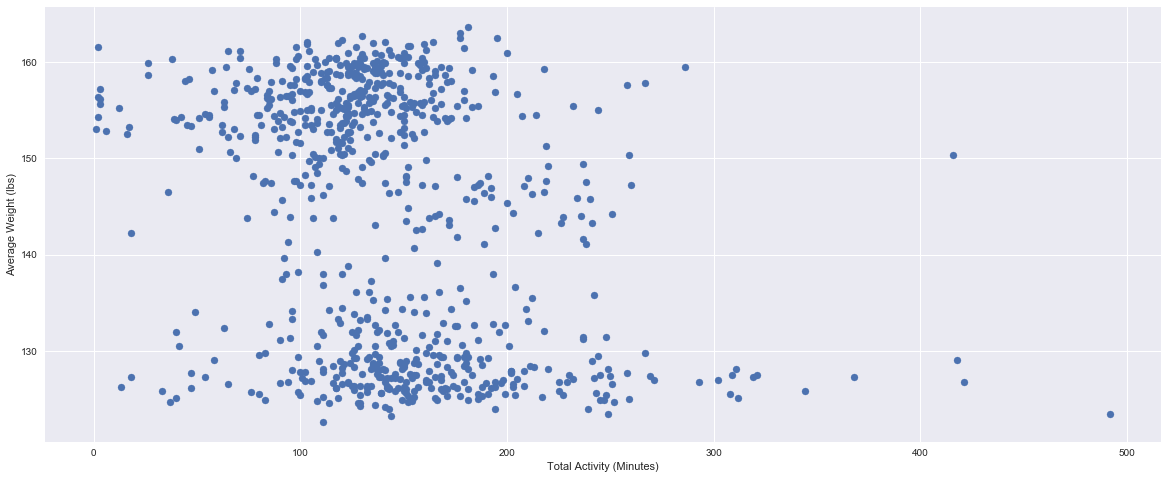

In [31]:
#Plot of (raw) Weights versus Activity at the same times. Grouping into two clusters of data

plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Total_minutes'],df_weight_active['weight'])
plt.xlabel('Total Activity (Minutes)')
plt.ylabel('Average Weight (lbs)')

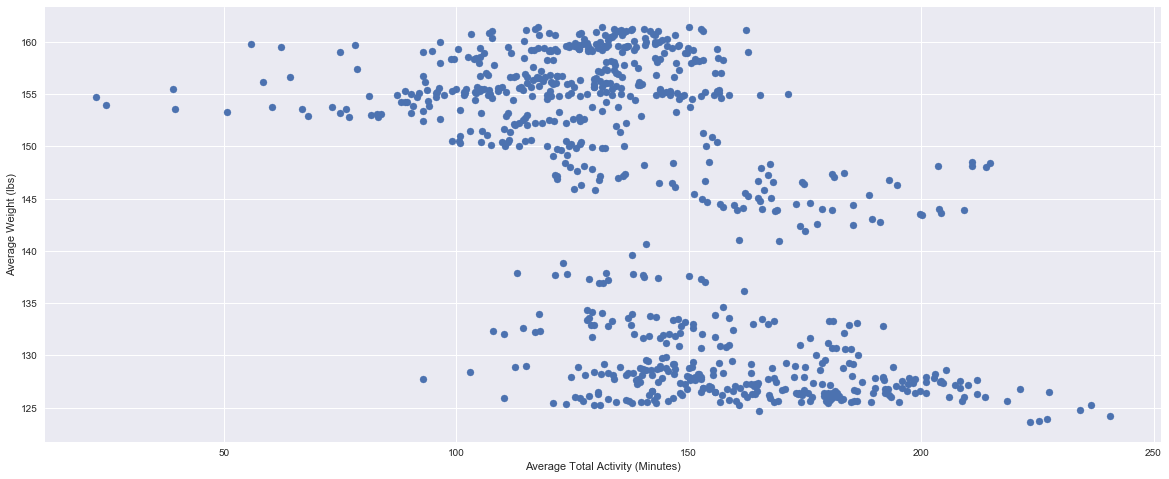

In [32]:
#Plot of Avg Weights versus Avg Activity at the same times. Shows that there is some clustering of data. More activity is correlated with less weight

plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Rolling Avg Activity'],df_weight_active['Rolling Avg Weight'])
plt.xlabel('Average Total Activity (Minutes)')
plt.ylabel('Average Weight (lbs)')
    

In [33]:
###Weight and Data about Calories ###########################################################

In [34]:
#Same procedure of taking data for calories and putting it together into a larger DataFrame 

In [35]:
tracker_cal_2013 = pd.DataFrame(fit_data_0['tracker-calories']['2013']['activities-tracker-calories'])
tracker_cal_2013['dateTime'] = pd.to_datetime(tracker_cal_2013['dateTime'])
tracker_cal_2013.columns = ['date','Tracker_Calories']
tracker_cal_2014 = pd.DataFrame(fit_data_0['tracker-calories']['2014']['activities-tracker-calories'])
tracker_cal_2014['dateTime'] = pd.to_datetime(tracker_cal_2014['dateTime'])
tracker_cal_2014.columns = ['date','Tracker_Calories']
tracker_cal_2015 = pd.DataFrame(fit_data_0['tracker-calories']['2015']['activities-tracker-calories'])
tracker_cal_2015['dateTime'] = pd.to_datetime(tracker_cal_2015['dateTime'])
tracker_cal_2015.columns = ['date','Tracker_Calories']
tracker_cal_2016 = pd.DataFrame(fit_data_0['tracker-calories']['2016']['activities-tracker-calories'])
tracker_cal_2016['dateTime'] = pd.to_datetime(tracker_cal_2016['dateTime'])
tracker_cal_2016.columns = ['date','Tracker_Calories']
tracker_cal_2017 = pd.DataFrame(fit_data_0['tracker-calories']['2017']['activities-tracker-calories'])
tracker_cal_2017['dateTime'] = pd.to_datetime(tracker_cal_2017['dateTime'])
tracker_cal_2017.columns = ['date','Tracker_Calories']

In [36]:
tracker_calories = pd.concat([tracker_cal_2013, tracker_cal_2014,tracker_cal_2015,tracker_cal_2016,tracker_cal_2017])
tracker_calories['Tracker_Calories'] = tracker_calories['Tracker_Calories'].astype(int)
tracker_calories = tracker_calories.reset_index(drop=True)
tracker_calories_red = tracker_calories[183:1309].reset_index(drop=True)

In [37]:
tracker_act_cal_2013 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2013']['activities-tracker-activityCalories'])
tracker_act_cal_2013['dateTime'] = pd.to_datetime(tracker_act_cal_2013['dateTime'])
tracker_act_cal_2013.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2014 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2014']['activities-tracker-activityCalories'])
tracker_act_cal_2014['dateTime'] = pd.to_datetime(tracker_act_cal_2014['dateTime'])
tracker_act_cal_2014.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2015 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2015']['activities-tracker-activityCalories'])
tracker_act_cal_2015['dateTime'] = pd.to_datetime(tracker_act_cal_2015['dateTime'])
tracker_act_cal_2015.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2016 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2016']['activities-tracker-activityCalories'])
tracker_act_cal_2016['dateTime'] = pd.to_datetime(tracker_act_cal_2016['dateTime'])
tracker_act_cal_2016.columns = ['date','Tracker_Act_Calories']

In [38]:
#Combine data and Define new columns for a ratio of activity calories to total calories taken in

#Also excess calories = total - activity calories

tracker_act_calories = pd.concat([tracker_act_cal_2013, tracker_act_cal_2014,tracker_act_cal_2015,tracker_act_cal_2016])
tracker_act_calories['Tracker_Act_Calories'] = tracker_act_calories['Tracker_Act_Calories'].astype(int)
tracker_act_calories_red = tracker_act_calories[183:1309].reset_index(drop=True)
tracker_act_calories_red = tracker_act_calories_red.drop('date', axis=1)
total_calories = pd.concat([tracker_act_calories_red,tracker_calories_red],axis=1)
total_calories['Ratio'] = total_calories['Tracker_Act_Calories']/total_calories['Tracker_Calories']
total_calories['Excess'] = total_calories['Tracker_Calories']-total_calories['Tracker_Act_Calories']
total_calories_new = total_calories.set_index('date')
total_calories_weight = pd.concat([total_calories_new,df_weight_red_date], axis=1)
total_calories_weight = total_calories_weight.dropna()


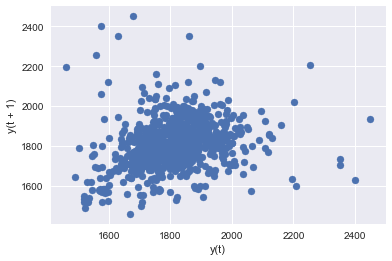

In [39]:
#Lag plot for Tracker Calories 

lag_plot(total_calories_weight['Tracker_Calories'])
plt.show()

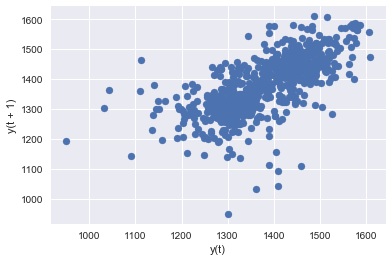

In [40]:
#Lag plot for Excess calories 

lag_plot(total_calories_weight['Excess'])
plt.show()

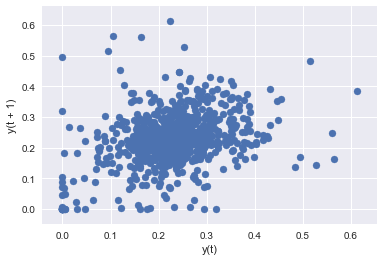

In [41]:
#Lag plot for calorie ratio

lag_plot(total_calories_weight['Ratio'])
plt.show()

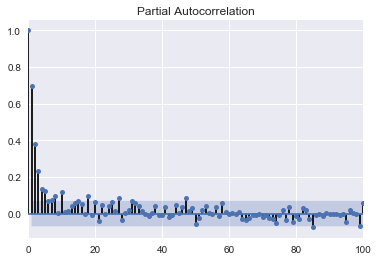

In [46]:
#Plot of the partial autocorrelation function for Excess

plot_pacf(total_calories_weight['Excess'])
plt.xlim(0,100)
plt.show()

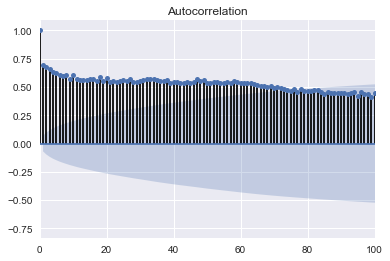

In [47]:
#Autocorrelation for Excess Calories, not a stationary time series
plot_acf(total_calories_weight['Excess'])
plt.xlim(0,100)
plt.show()


In [48]:
#Rolling Averages for Calorie Ratio and Weight, along with plots. Here I looked at monthly average

total_calories_weight['Rolling Avg Ratio'] = total_calories_weight['Ratio'].rolling(window=30).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=30).mean()

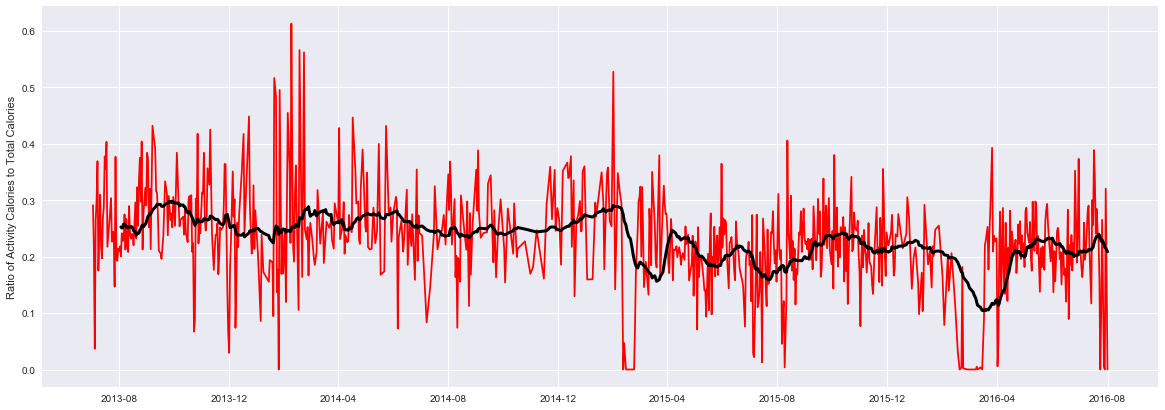

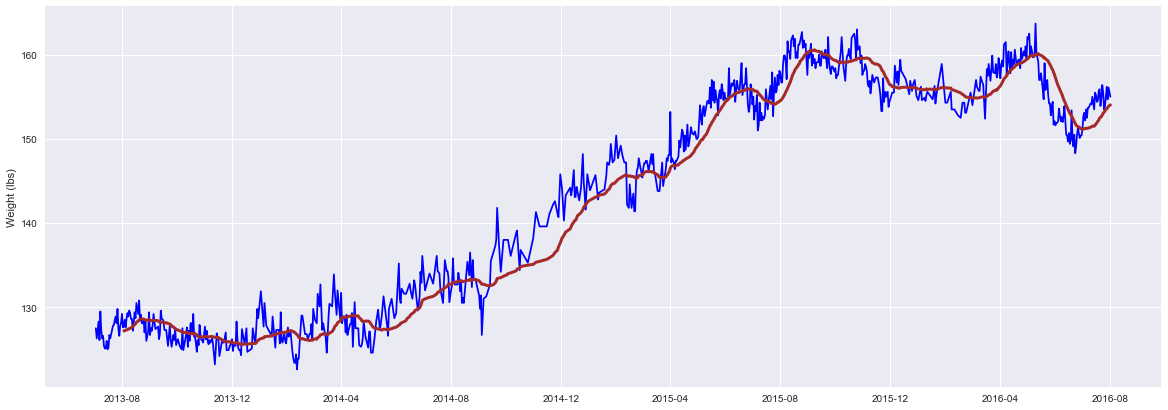

In [49]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Ratio'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Ratio'], 'black',linewidth=3.0)
plt.ylabel('Ratio of Activity Calories to Total Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')



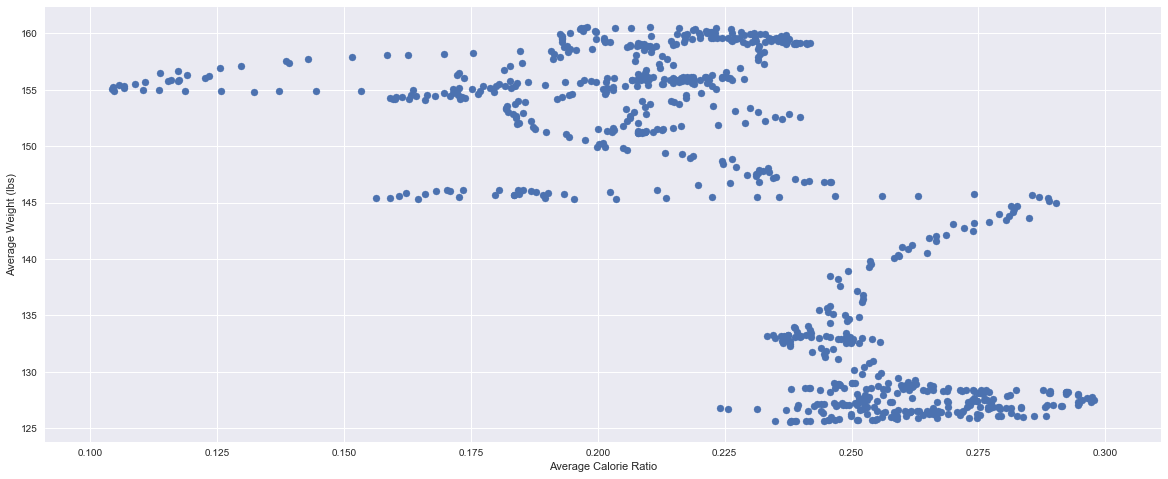

In [50]:
#Plot of Rolling average calorie ratio and weights at the times

plt.figure(1,figsize=(20,8))
plt.xlabel('Average Calorie Ratio')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Ratio'],total_calories_weight['Rolling Avg Weight'])

In [51]:
#Plots for Excess Calories together with Weight over Time 

In [52]:
total_calories_weight['Rolling Avg Excess'] = total_calories_weight['Excess'].rolling(window=7).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=7).mean()

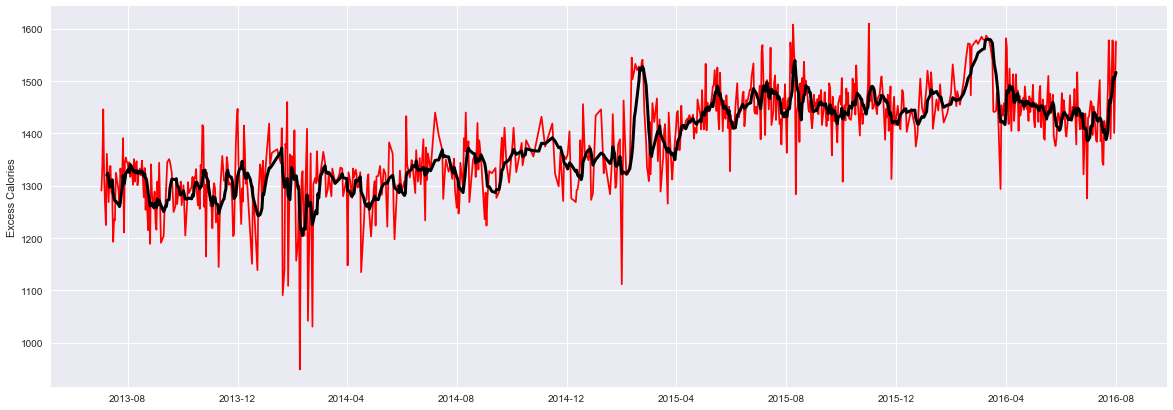

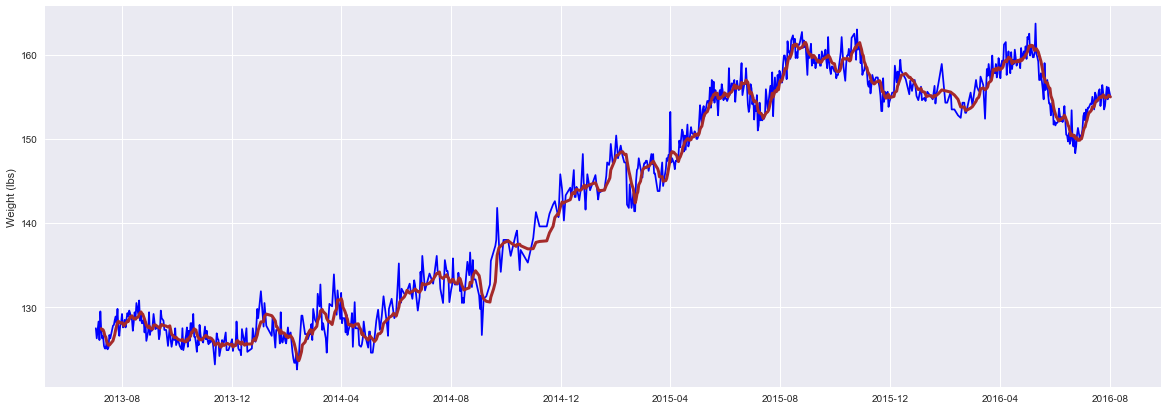

In [53]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Excess'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Excess'], 'black',linewidth=3.0)
plt.ylabel('Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

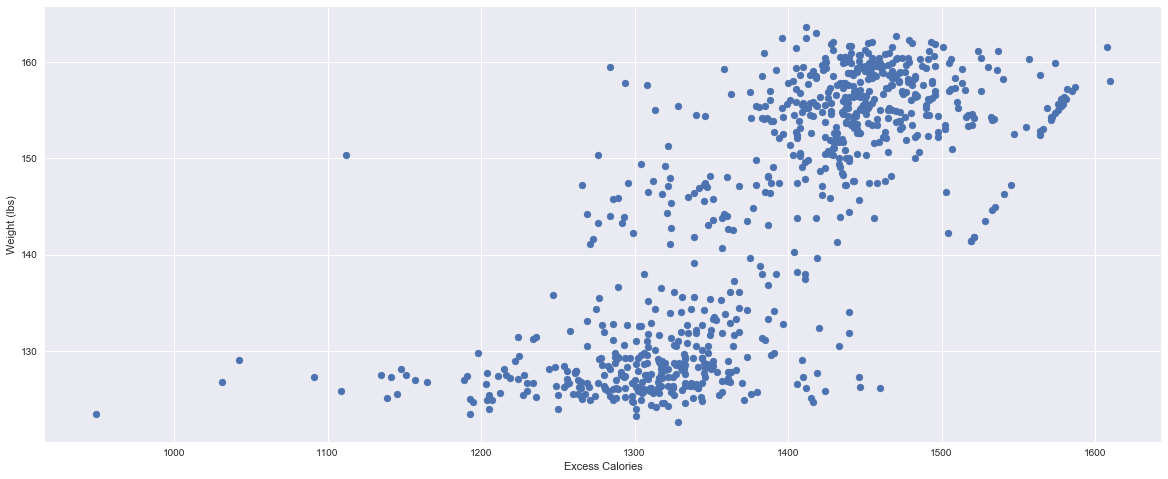

In [54]:
#Plot of (raw) Weight and Excess Calories at the same time. Shows some good correlation with larger weight, larger excess calories

plt.figure(1,figsize=(20,8))
plt.xlabel('Excess Calories')
plt.ylabel('Weight (lbs)')
plt.scatter(total_calories_weight['Excess'],total_calories_weight['weight'])

In [55]:
#Crosss correlation between (raw) Excess and weight

for i in range(0,20,1):
    print('shift day:', i, total_calories_weight['Excess'].corr(total_calories_weight['weight'].shift(i)))  

shift day: 0 0.759996471284
shift day: 1 0.758473266327
shift day: 2 0.758565127981
shift day: 3 0.753431871887
shift day: 4 0.757768813965
shift day: 5 0.762534002826
shift day: 6 0.75795310049
shift day: 7 0.759758675149
shift day: 8 0.760105220373
shift day: 9 0.761344489068
shift day: 10 0.759627868055
shift day: 11 0.758825927325
shift day: 12 0.761328358541
shift day: 13 0.754208644606
shift day: 14 0.752248416497
shift day: 15 0.750787608613
shift day: 16 0.749114850625
shift day: 17 0.747272653768
shift day: 18 0.743662589631
shift day: 19 0.746120697025


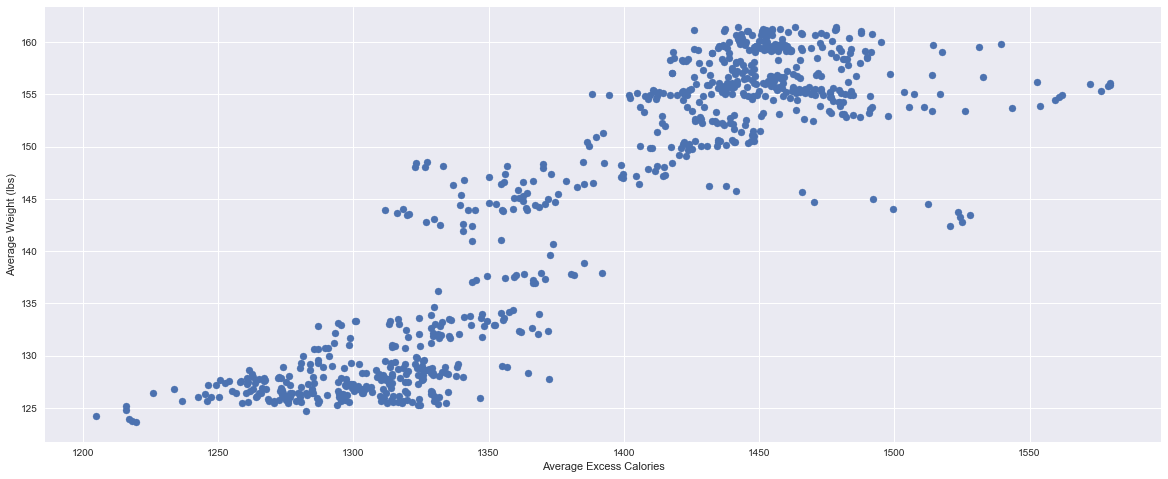

In [56]:
#Plot of Average Weight and Average Excess Calories. Shows a pretty strong correlation, stronger than the other variables 

plt.figure(1,figsize=(20,8))
plt.xlabel('Average Excess Calories')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Excess'],total_calories_weight['Rolling Avg Weight'])

In [57]:
#cross correlation function between Excess and Weight

for i in range(0,20,1):
    print('shift day:', i, total_calories_weight['Rolling Avg Excess'].corr(total_calories_weight['Rolling Avg Weight'].shift(i)))  

shift day: 0 0.90202901401
shift day: 1 0.901601426507
shift day: 2 0.90124769147
shift day: 3 0.900858721267
shift day: 4 0.900771563516
shift day: 5 0.900899667984
shift day: 6 0.900966039953
shift day: 7 0.901068622641
shift day: 8 0.900987847611
shift day: 9 0.900719038445
shift day: 10 0.900162290612
shift day: 11 0.899170965799
shift day: 12 0.897836025896
shift day: 13 0.89622792559
shift day: 14 0.89438330178
shift day: 15 0.892435565723
shift day: 16 0.890523317355
shift day: 17 0.888849376038
shift day: 18 0.887139475506
shift day: 19 0.885642531331


In [58]:
#Study the possible relationship between Excess calories and Weight time series:

In [59]:
#Excess calories as the x variable and weight as the y 

In [60]:
#Take first differences of Excess Calories to "difference" the variables. Variables look stationary. 

total_calories_weight['Diff Excess'] = total_calories_weight['Excess'].diff()
#total_calories_weight['Diff Weight'] = total_calories_weight['weight'].diff()

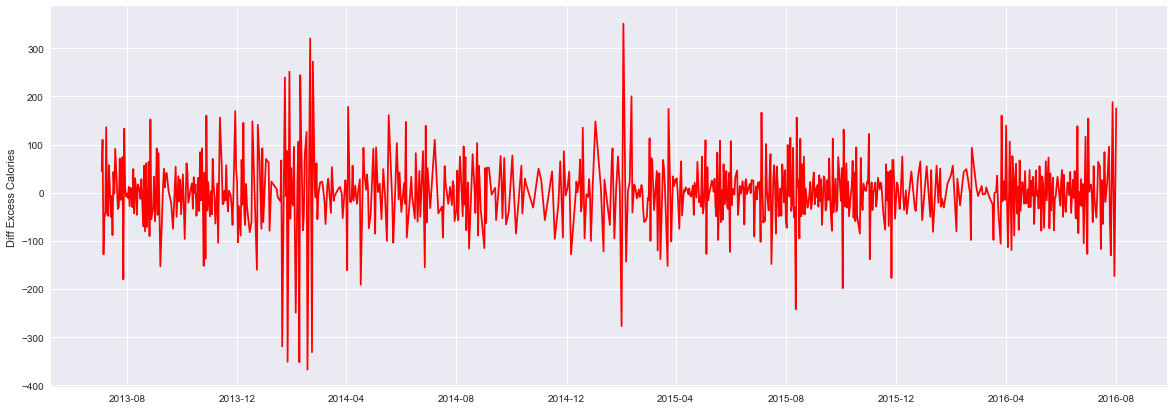

In [61]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Diff Excess'],'r')
plt.ylabel('Diff Excess Calories')
#fig2, ax2 = plt.subplots(figsize=(20,7))
#plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['Diff Weight'],'b')
#plt.ylabel('Diff Weight (lbs)')

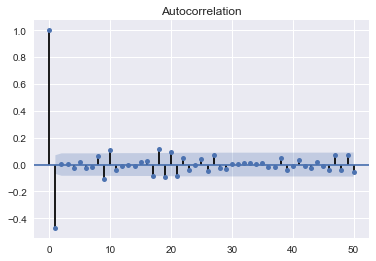

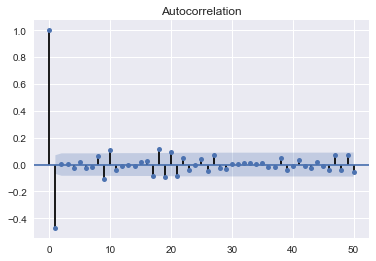

In [62]:
#Autocorrelation and PACF plots for the Differences of Excess . Only one autocorrelation at Lag of 1 day is significant. 
plot_acf(total_calories_weight['Diff Excess'].loc['2013-07-04':], lags=50)

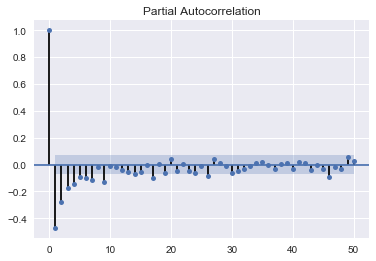

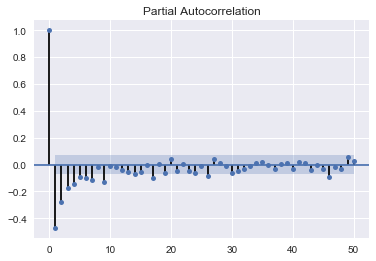

In [59]:
plot_pacf(total_calories_weight['Diff Excess'].loc['2013-07-04':], lags=50)

In [63]:
#The above suggests a ARIMA(0,1,1) model with a difference and moving average MA(1)

const             0.226012
ma.L1.D.Excess   -0.794709
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:               D.Excess   No. Observations:                  799
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4382.664
Method:                       css-mle   S.D. of innovations             58.301
Date:                Mon, 01 Jan 2018   AIC                           8771.327
Time:                        22:42:49   BIC                           8785.378
Sample:                    07-04-2013   HQIC                          8776.725
                         - 08-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2260      0.426      0.531      0.595      -0.608       1.060
ma.L1.D.Excess    -0.7947      0.031    -25.724   

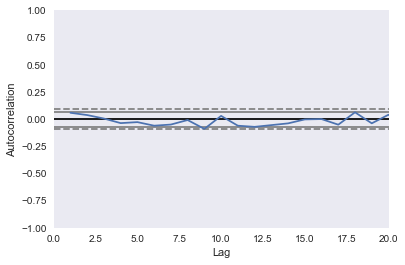

In [64]:
model = ARIMA(total_calories_weight['Excess'].astype('float64'),(0,1,1))
results = model.fit()
print(results.params)
print(results.summary())
autocorrelation_plot(results.resid)
plt.xlim(0,20)
plt.show()

const           1390.690366
ar.L1.Excess       0.985509
ma.L1.Excess      -0.769857
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                 Excess   No. Observations:                  800
Model:                     ARMA(1, 1)   Log Likelihood               -4386.096
Method:                       css-mle   S.D. of innovations             58.130
Date:                Mon, 01 Jan 2018   AIC                           8780.191
Time:                        22:43:40   BIC                           8798.929
Sample:                    07-03-2013   HQIC                          8787.389
                         - 08-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1390.6904     30.312     45.879      0.000    1331.279    1450.101
ar.L1.Excess     0.9855   

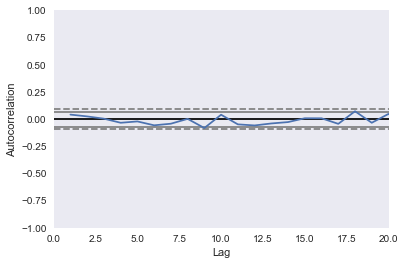

In [65]:
#try ARMA model too

model = ARIMA(total_calories_weight['Excess'].astype('float64'),(1,0,1))
results = model.fit()
print(results.params)
print(results.summary())
autocorrelation_plot(results.resid)
plt.xlim(0,20)
plt.show()

In [ ]:
#both appear to be a good models of the Excess calories, perhaps the ARMA is better due to low p-value for the constant....

In [145]:
weights_arr = np.array(total_calories_weight['weight'])
resid_arr = np.array(results.resid)


In [148]:
alpha_test = 1-0.7947
weights_filter = lfilter([alpha_test],[1,alpha_test-1],weights_arr)
diff_y = weights_arr-weights_filter

In [149]:
df_weights_filter = pd.DataFrame(data = diff_y, index=total_calories_weight.index,columns=['Filter weight'])

In [150]:
 for i in range(-20,20,1):
    print('shift day:', i, results.resid.corr(df_weights_filter['Filter weight'].shift(i))) 

shift day: -20 0.0557596470216
shift day: -19 -0.0343918537225
shift day: -18 -0.0112611379732
shift day: -17 0.0181475800615
shift day: -16 -0.0102569069891
shift day: -15 0.0536300486647
shift day: -14 0.0742421351561
shift day: -13 0.0664673345579
shift day: -12 0.00615598386613
shift day: -11 -0.0316305557922
shift day: -10 -0.00391860604326
shift day: -9 -0.0200574626331
shift day: -8 -0.0049554620811
shift day: -7 0.00418729237663
shift day: -6 0.0318183704635
shift day: -5 0.00654154937782
shift day: -4 0.0227522355337
shift day: -3 0.0382091951929
shift day: -2 0.0153731917638
shift day: -1 0.0229814909655
shift day: 0 0.020173444988
shift day: 1 0.0160013042572
shift day: 2 0.000871389677355
shift day: 3 -0.083633836999
shift day: 4 -0.0636121854614
shift day: 5 -0.0222422711518
shift day: 6 0.00129968236022
shift day: 7 -0.0184733004169
shift day: 8 -0.0217611692628
shift day: 9 -0.000168108551799
shift day: 10 -0.0167289876775
shift day: 11 -0.0363419495254
shift day: 12 -0.

In [136]:
total_calories_weight['Exp Avg Weight'] = total_calories_weight['weight'].ewm(alpha=alpha_test,adjust=False).mean()

In [137]:
for i in range(-20,20,1):
    print('shift day:', i, results.resid.corr(total_calories_weight['Exp Avg Weight'].shift(i))) 

shift day: -20 0.00221092936172
shift day: -19 -4.03891260846e-05
shift day: -18 0.000188959348838
shift day: -17 0.00111898707452
shift day: -16 0.00213474505578
shift day: -15 0.00147302554172
shift day: -14 -0.000183695150518
shift day: -13 -0.00349069863172
shift day: -12 -0.00639546123686
shift day: -11 -0.00591095864634
shift day: -10 -0.00485237260531
shift day: -9 -0.00449012413009
shift day: -8 -0.00327534473187
shift day: -7 -0.00151895863457
shift day: -6 0.00146087239344
shift day: -5 0.00192326570955
shift day: -4 0.000693642222464
shift day: -3 0.00250411570452
shift day: -2 0.00289987946537
shift day: -1 0.0010395628635
shift day: 0 0.00209023455751
shift day: 1 0.00158424916503
shift day: 2 0.00270606133712
shift day: 3 0.00592751083259
shift day: 4 0.0071970135786
shift day: 5 0.00544038129067
shift day: 6 0.00122862571855
shift day: 7 0.00292221337051
shift day: 8 0.00236734248514
shift day: 9 0.000318245712154
shift day: 10 -0.000768355374867
shift day: 11 -0.0011362

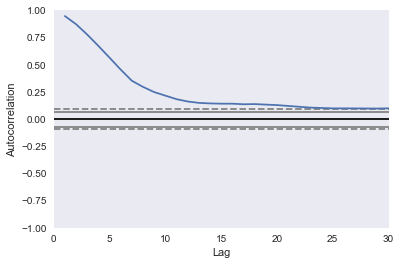

In [67]:
#Perform an ordinary linear regression using statsmodels package
#For variables at the same time , check whether there are correlations with the residuals 

Y1 = total_calories_weight['Rolling Avg Weight'].loc['2013-07-09':]
X1 = total_calories_weight['Rolling Avg Excess'].loc['2013-07-09':]
X1 = sm.add_constant(X1)

model1 = sm.OLS(Y1,X1)
results1 = model1.fit()
autocorrelation_plot(results1.resid)
plt.xlim(0,30)
plt.show()




In [72]:
model_1a = sm.GLSAR(Y1, X1, rho=3)
results_1a = model_1a.fit()
results_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:     Rolling Avg Weight   R-squared:                       0.813
Model:                          GLSAR   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3440.
Date:                Sun, 31 Dec 2017   Prob (F-statistic):          6.89e-290
Time:                        17:16:15   Log-Likelihood:                -2501.9
No. Observations:                 791   AIC:                             5008.
Df Residuals:                     789   BIC:                             5017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -66.8689      3.603    -18.557      0.000     -73.942     -59.795
Rolling Avg Excess     0.1521      0.003     58.653      0.000       0.147       0.157
==============================================================================
Omnibus:                       66.044   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.458
Skew:                          -0.659   Prob(JB):                     2.28e-20
Kurtosis:                       4.005   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
###Consider Sleep minutes and Weight Data ###########################################################

In [58]:
sleep_min_2013 = pd.DataFrame(fit_data_0['sleep-minutes']['2013']['sleep-minutesAsleep'])
sleep_min_2013['dateTime'] = pd.to_datetime(sleep_min_2013['dateTime'])
sleep_min_2013.columns = ['date','Sleep_Minutes']
sleep_min_2014 = pd.DataFrame(fit_data_0['sleep-minutes']['2014']['sleep-minutesAsleep'])
sleep_min_2014['dateTime'] = pd.to_datetime(sleep_min_2014['dateTime'])
sleep_min_2014.columns = ['date','Sleep_Minutes']
sleep_min_2015 = pd.DataFrame(fit_data_0['sleep-minutes']['2015']['sleep-minutesAsleep'])
sleep_min_2015['dateTime'] = pd.to_datetime(sleep_min_2015['dateTime'])
sleep_min_2015.columns = ['date','Sleep_Minutes']
sleep_min_2016 = pd.DataFrame(fit_data_0['sleep-minutes']['2016']['sleep-minutesAsleep'])
sleep_min_2016['dateTime'] = pd.to_datetime(sleep_min_2016['dateTime'])
sleep_min_2016.columns = ['date','Sleep_Minutes']

In [59]:
sleep_min_total = pd.concat([sleep_min_2013,sleep_min_2014,sleep_min_2015,sleep_min_2016])
sleep_min_total = sleep_min_total.reset_index(drop=True)
sleep_min_total = sleep_min_total[183:1300]
sleep_min_total = sleep_min_total.set_index('date')

In [60]:
df_weight_sleep = pd.concat([sleep_min_total,df_weight_red_date],axis=1)
df_weight_sleep = df_weight_sleep.dropna()

In [61]:
#Rolling Average for Sleep Minutes and for Weight

df_weight_sleep['Rolling Avg Sleep'] = df_weight_sleep['Sleep_Minutes'].rolling(window=7).mean()
df_weight_sleep['Rolling Avg Weight'] = df_weight_sleep['weight'].rolling(window=7).mean()

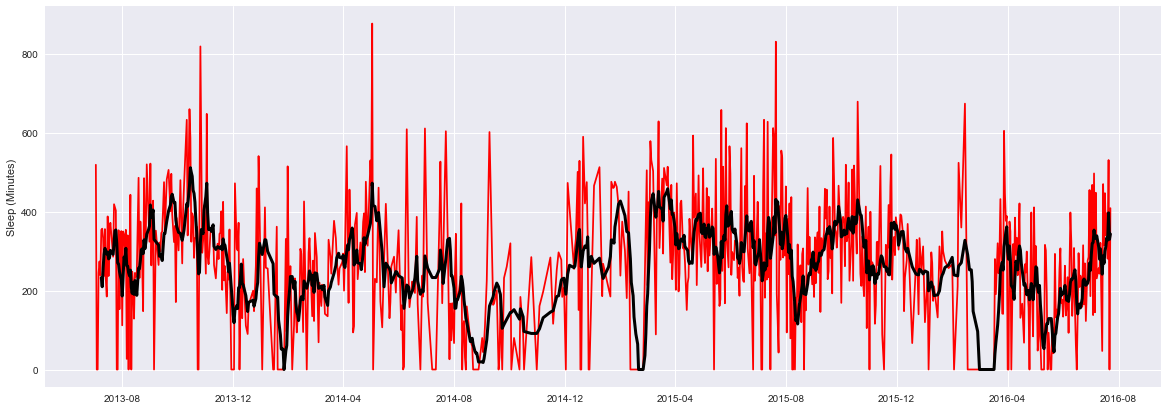

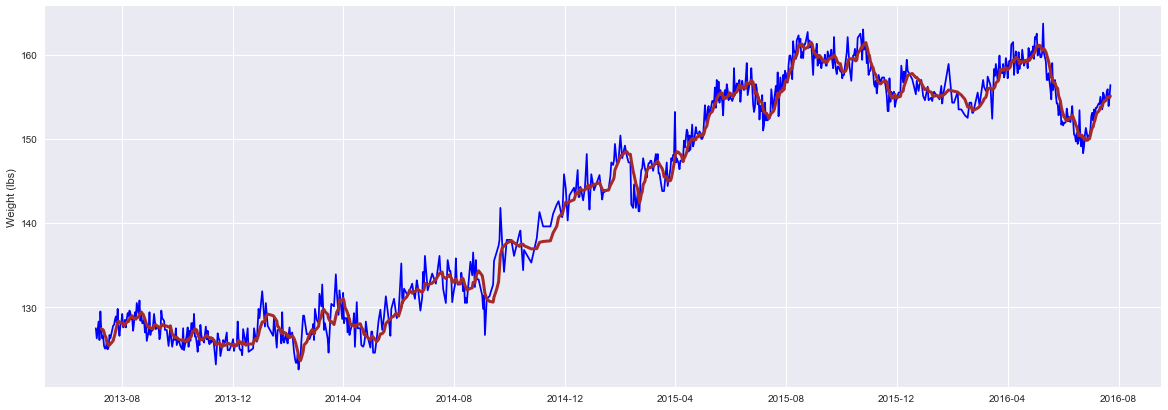

In [62]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Sleep_Minutes'],'r')
plot2 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Sleep'], 'black',linewidth=3.0)
plt.ylabel('Sleep (Minutes)')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep.index,df_weight_sleep['weight'],'b')
plot4 = ax2.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

In [63]:
for i in range(-7,8,1):
    print('shift day:', i, df_weight_sleep['Rolling Avg Weight'].corr(df_weight_sleep['Rolling Avg Sleep'].shift(i)))

shift day: -7 0.0234339934698
shift day: -6 0.024622033504
shift day: -5 0.0258268654479
shift day: -4 0.0270752803315
shift day: -3 0.0284345531931
shift day: -2 0.0303621523845
shift day: -1 0.0334035526548
shift day: 0 0.0359813044597
shift day: 1 0.0366942427957
shift day: 2 0.0367497424024
shift day: 3 0.035302850196
shift day: 4 0.0344408764186
shift day: 5 0.0328501655847
shift day: 6 0.0310085002093
shift day: 7 0.0289634962064


In [64]:
# Now look at sleep efficiency data 

In [65]:
sleep_eff_2013 = pd.DataFrame(fit_data_0['sleep-efficiency']['2013']['sleep-efficiency'])
sleep_eff_2013['dateTime'] = pd.to_datetime(sleep_eff_2013['dateTime'])
sleep_eff_2013.columns = ['date','sleep_eff']
sleep_eff_2014 = pd.DataFrame(fit_data_0['sleep-efficiency']['2014']['sleep-efficiency'])
sleep_eff_2014['dateTime'] = pd.to_datetime(sleep_eff_2014['dateTime'])
sleep_eff_2014.columns = ['date','sleep_eff']
sleep_eff_2015 = pd.DataFrame(fit_data_0['sleep-efficiency']['2015']['sleep-efficiency'])
sleep_eff_2015['dateTime'] = pd.to_datetime(sleep_eff_2015['dateTime'])
sleep_eff_2015.columns = ['date','sleep_eff']
sleep_eff_2016 = pd.DataFrame(fit_data_0['sleep-efficiency']['2016']['sleep-efficiency'])
sleep_eff_2016['dateTime'] = pd.to_datetime(sleep_eff_2016['dateTime'])
sleep_eff_2016.columns = ['date','sleep_eff']

In [66]:
sleep_eff_total = pd.concat([sleep_eff_2013,sleep_eff_2014,sleep_eff_2015,sleep_eff_2016])


In [67]:
sleep_eff_total = sleep_eff_total.reset_index(drop=True)
sleep_eff_total = sleep_eff_total[183:1300]
sleep_eff_total = sleep_eff_total.set_index('date')



In [68]:
df_weight_sleep_eff = pd.concat([sleep_eff_total,df_weight_red_date],axis=1)
df_weight_sleep_eff = df_weight_sleep_eff.dropna()

In [69]:
#Data is noisy, look at 30 day rolling average

df_weight_sleep_eff['Rolling Avg Sleep Eff'] = df_weight_sleep_eff['sleep_eff'].rolling(window=30).mean()
df_weight_sleep_eff['Rolling Avg Weight'] = df_weight_sleep_eff['weight'].rolling(window=30).mean()

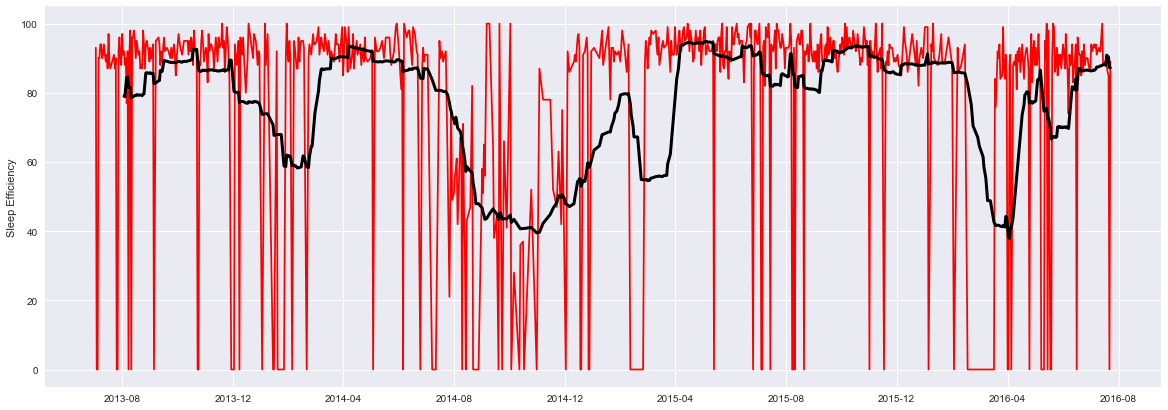

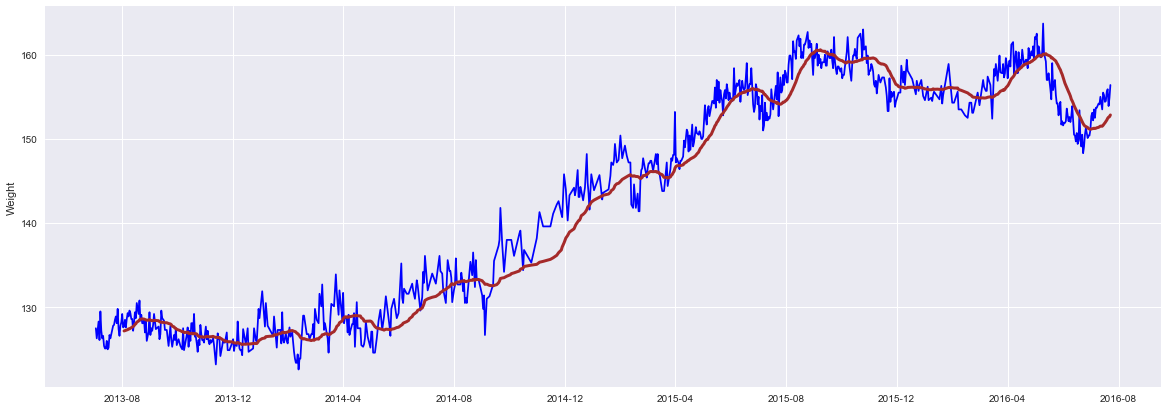

In [70]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['sleep_eff'],'r')
plot2 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Sleep Eff'], 'black',linewidth=3.0)
plt.ylabel('Sleep Efficiency')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['weight'],'b')
plot4 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight')

In [71]:
for i in range(-7,7,1):
    print('shift day:', i, df_weight_sleep_eff['Rolling Avg Weight'].corr(df_weight_sleep_eff['Rolling Avg Sleep Eff'].shift(i)))

shift day: -7 0.129544800074
shift day: -6 0.12785742796
shift day: -5 0.126132203501
shift day: -4 0.124035110964
shift day: -3 0.121894076323
shift day: -2 0.119993555327
shift day: -1 0.118413965937
shift day: 0 0.116730738098
shift day: 1 0.114686339824
shift day: 2 0.112529510758
shift day: 3 0.110136098455
shift day: 4 0.107650284295
shift day: 5 0.105065107983
shift day: 6 0.102545250005


In [ ]:
#####OLD STUFF BELOW################################################

In [ ]:
min_active_total_red = min_active_total.loc[183:1308]
min_active_total_red = min_active_total_red.reset_index(drop=True)

In [ ]:
sum_list = []
sum_min = min_active_total_red.iloc[0]['Total_minutes']
for i in range(1,len(min_active_total_red)):
    if i%7 != 0:
        sum_min += min_active_total_red.iloc[i]['Total_minutes']
    else: 
        sum_list.append(sum_min)
        sum_min = min_active_total_red.iloc[i]['Total_minutes']

In [ ]:
index_list = list(range(7,7*len(sum_list)+1,7))
df_sum = pd.DataFrame(list(zip(index_list,sum_list)),columns=['Day','Weekly_sum'])
df_sum = df_sum.set_index('Day')
df_sum

In [ ]:
df_weight_sum = pd.concat([df_sum,df_weight_red],axis=1)



In [ ]:
df_weight_sum_new = df_weight_sum.dropna()

In [ ]:
weekly_pct_change = []
for i in range(0,792,7):
    ratio = (df_weight_sum.iloc[i+7]['weight']-df_weight_sum.iloc[i]['weight'])/df_weight_sum.iloc[i]['weight']
    weekly_pct_change.append(ratio)

In [ ]:
plt.figure(1,figsize=(20,10))
plt.scatter(df_weight_sum_new['Weekly_sum'],weekly_pct_change)

In [71]:
sum_cal_list = []
sum_act_cal_list = []
sum_cal = total_calories.iloc[0]['Tracker_Calories']
sum_act_cal = total_calories.iloc[0]['Tracker_Act_Calories']
for i in range(1,len(total_calories)):
    if i%7 != 0:
        sum_cal += total_calories.iloc[i]['Tracker_Calories']
        sum_act_cal += total_calories.iloc[i]['Tracker_Act_Calories']
    else: 
        sum_cal_list.append(sum_cal)
        sum_act_cal_list.append(sum_act_cal)
        sum_cal = total_calories.iloc[i]['Tracker_Calories']
        sum_act_cal = total_calories.iloc[i]['Tracker_Act_Calories']

In [75]:
df_sum_cal = pd.DataFrame(list(zip(index_list,sum_cal_list,sum_act_cal_list)),columns=['Day','Weekly_Calories','Weekly_Act_Calories'])
df_sum_cal = df_sum_cal.set_index('Day')
df_sum_cal['Weekly_Ratio'] = df_sum_cal['Weekly_Act_Calories']/df_sum_cal['Weekly_Calories']
df_sum_cal

Weekly_Calories  Weekly_Act_Calories  Weekly_Ratio
Day                                                     
7               12214                 2972      0.243327
14              12399                 3387      0.273167
21              13049                 4225      0.323780
28              12128                 2860      0.235818
35              11984                 2640      0.220294
42              12289                 3024      0.246074
49              12457                 3293      0.264349
56              12947                 4110      0.317448
63              12865                 3971      0.308667
70              13028                 4158      0.319159
77              12220                 3000      0.245499
84              12522                 3478      0.277751
91              12554                 3606      0.287239
98              12473                 3505      0.281007
105             12231                 3085      0.252228
112             12394                 3301      0.266339
119             12103                 2935      0.242502
126             12709                 3826      0.301047
133             12958                 4270      0.329526
140             11977                 2750      0.229607
147             12265                 3217      0.262291
154             11693                 2347      0.200718
161             12044                 2816      0.233809
168             12799                 4059      0.317134
175             12964                 4313      0.332691
182             12349                 3173      0.256944
189             12263                 2949      0.240479
196             12457                 3369      0.270450
203             13185                 4335      0.328783
210             12297                 3055      0.248435
...               ...                  ...           ...
917             12703                 2504      0.197119
924             12565                 2250      0.179069
931             12751                 2555      0.200376
938             12990                 2809      0.216243
945             12671                 2389      0.188541
952             12487                 2198      0.176023
959             12131                 1748      0.144094
966             11254                  384      0.034121
973             11020                    0      0.000000
980             11064                    0      0.000000
987             11077                   34      0.003069
994             12508                 2115      0.169092
1001            13355                 3406      0.255036
1008            12587                 2147      0.170573
1015            12777                 2491      0.194960
1022            13081                 2918      0.223072
1029            13121                 2925      0.222925
1036            13235                 3064      0.231507
1043            13281                 3114      0.234470
1050            13156                 3086      0.234570
1057            12718                 2544      0.200031
1064            13021                 3169      0.243376
1071            12587                 2545      0.202193
1078            12508                 2449      0.195795
1085            12392                 2271      0.183263
1092            12809                 2933      0.228980
1099            12798                 2892      0.225973
1106            12992                 3021      0.232528
1113            13571                 3756      0.276767
1120            12618                 2407      0.190759

[160 rows x 3 columns]

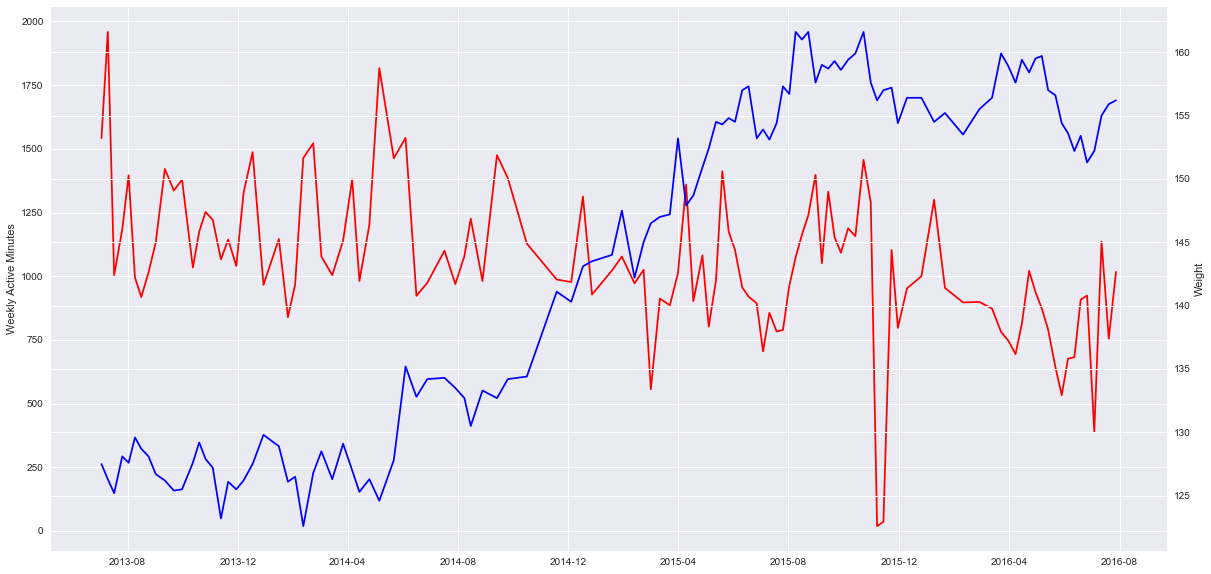

In [24]:
fig, ax1 = plt.subplots(figsize=(20,10))
plot1 = ax1.plot(df_weight_sum['date'],df_weight_sum['Weekly_sum'],'r',label='Weekly Active Minutes')
ax1.set_ylabel('Weekly Active Minutes')
ax2 = ax1.twinx()
plot2 = ax2.plot(df_weight_sum['date'],df_weight_sum['weight'], 'b', label='Weight')
ax2.set_ylabel('Weight')



In [25]:
pct_change_weight = df_weight_sum['weight'].pct_change()
pct_change_active = df_weight_sum['Weekly_sum'].pct_change()
df_change = pd.concat([pct_change_weight,pct_change_active,df_weight_sum['date']],axis=1)

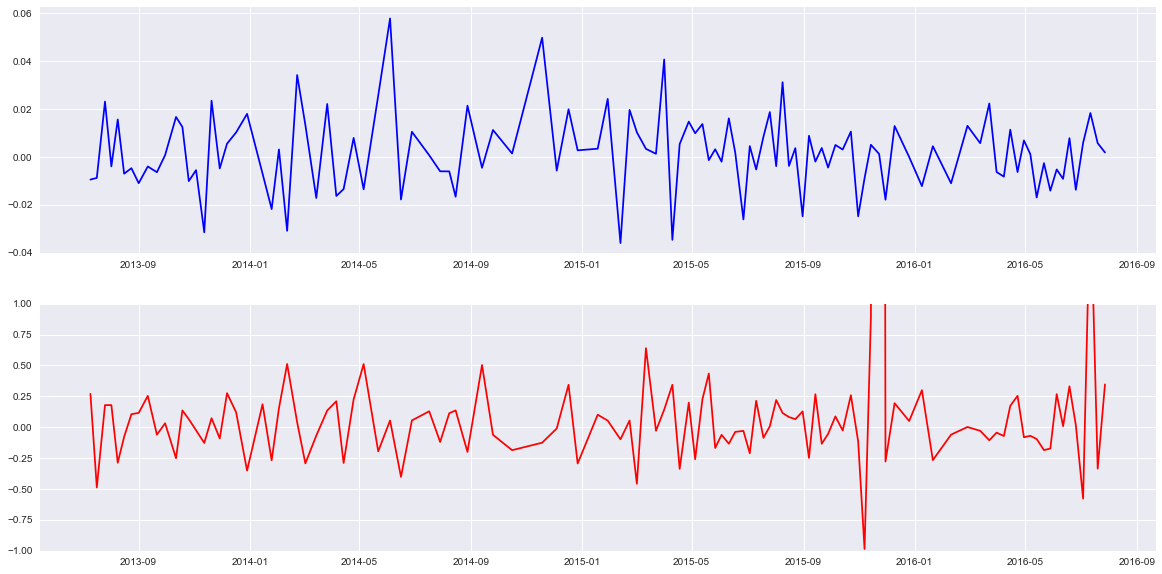

In [26]:
plt.figure(1,figsize=(20,10))
plt.subplot(211)
plt.plot(df_change['date'],df_change['weight'], 'b')
plt.subplot(212)
plt.ylim(-1,1)
plt.plot(df_change['date'],df_change['Weekly_sum'], 'r')

In [27]:
fair_sum_list = []
fair_sum_min = min_active_total_red.iloc[0]['very_minutes']
for i in range(1,len(min_active_total_red)):
    if i%7 != 0:
        fair_sum_min += min_active_total_red.iloc[i]['very_minutes']
    else: 
        fair_sum_list.append(fair_sum_min)
        fair_sum_min = min_active_total_red.iloc[i]['very_minutes']

In [28]:
df_fair_sum = pd.DataFrame(list(zip(index_list,fair_sum_list)),columns=['Day','Weekly_fair_sum'])
df_fair_sum = df_fair_sum.set_index('Day')
df_fair_sum
#df_weight_sum



Weekly_fair_sum
Day                  
7                  54
14                104
21                  9
28                  3
35                 46
42                  1
49                  2
56                 15
63                  6
70                  2
77                 19
84                  8
91                  3
98                 17
105                 8
112                 4
119                 2
126                 4
133                 3
140                 6
147                 3
154                 4
161                 4
168                 4
175                 5
182                 4
189                 8
196                19
203                13
210                 7
...               ...
931                11
938                 5
945                 5
952                 0
959                 0
966                 2
973                 0
980                 0
987                 0
994                 0
1001                0
1008                0
1015                0
1022                0
1029                0
1036                0
1043                8
1050                0
1057                0
1064                3
1071                0
1078                0
1085                0
1092                0
1099                0
1106                0
1113                0
1120                1
1127               19
1134                0

[162 rows x 1 columns]

In [31]:
weight_pct_change = pct_change_weight.loc[14:].reset_index(drop=True)
sum_act = df_weight_sum['Weekly_sum'].reset_index(drop=True)
print(len(sum_act))
print(len(weight_pct_change))

115
86


In [94]:
df_weight_sum_2 = pd.concat([df_fair_sum,df_weight_red],axis=1)
df_weight_sum_2 = df_weight_sum_2.dropna()
df_weight_sum_2

Weekly_fair_sum    bmi       date        fat         logId source  \
7               54.0  21.88 2013-07-03  12.359000  1.372823e+12   Aria   
14             104.0  21.68 2013-07-10  13.015000  1.373439e+12   Aria   
21               9.0  21.49 2013-07-17  13.015000  1.374042e+12   Aria   
28               3.0  21.99 2013-07-26  13.300000  1.374808e+12   Aria   
35              46.0  21.90 2013-08-02  13.070000  1.375420e+12   Aria   
42               1.0  22.25 2013-08-09  13.071000  1.376027e+12   Aria   
49               2.0  22.08 2013-08-16  13.251000  1.376677e+12   Aria   
56              15.0  21.99 2013-08-24  13.701000  1.377321e+12   Aria   
63               6.0  21.74 2013-09-01  13.117000  1.378011e+12   Aria   
70               2.0  21.65 2013-09-11  12.819000  1.378874e+12   Aria   
77              19.0  21.52 2013-09-21  12.871000  1.379756e+12   Aria   
84               8.0  21.54 2013-09-30  12.861000  1.380517e+12   Aria   
91               3.0  21.90 2013-10-12  12.998000  1.381580e+12   Aria   
98              17.0  22.18 2013-10-19  13.023000  1.382178e+12   Aria   
105              8.0  21.95 2013-10-26  12.460000  1.382764e+12   Aria   
112              4.0  21.84 2013-11-03  12.913000  1.383466e+12   Aria   
119              2.0  21.14 2013-11-12  12.439000  1.384242e+12   Aria   
126              4.0  21.64 2013-11-20  12.101000  1.384923e+12   Aria   
133              3.0  21.54 2013-11-29  12.801000  1.385734e+12   Aria   
140              6.0  21.65 2013-12-07  13.351000  1.386413e+12   Aria   
147              3.0  21.88 2013-12-17  13.016000  1.387311e+12   Aria   
154              4.0  22.27 2013-12-29  12.702000  1.388335e+12   Aria   
161              4.0  22.12 2014-01-15  12.548000  1.389817e+12   Aria   
168              4.0  21.64 2014-01-25  12.841000  1.390643e+12   Aria   
175              5.0  21.70 2014-02-02  12.685000  1.391337e+12   Aria   
182              4.0  21.04 2014-02-11  12.753000  1.392118e+12   Aria   
189              8.0  21.76 2014-02-22  11.595000  1.393101e+12   Aria   
196             19.0  22.05 2014-03-03  12.948000  1.393829e+12   Aria   
203             13.0  21.67 2014-03-15  13.804000  1.394865e+12   Aria   
210              7.0  22.15 2014-03-27  14.041000  1.395908e+12   Aria   
..               ...    ...        ...        ...           ...    ...   
602             13.0  27.05 2015-10-31  20.396999  1.446270e+12   Aria   
609              2.0  26.81 2015-11-07  20.375000  1.446890e+12   Aria   
616              3.0  26.94 2015-11-14  21.145000  1.447489e+12   Aria   
623              8.0  26.98 2015-11-23  21.243999  1.448315e+12   Aria   
630              6.0  26.50 2015-11-30  21.576000  1.448869e+12   Aria   
637              3.0  26.84 2015-12-10  20.790001  1.449717e+12   Aria   
644              4.0  26.84 2015-12-26  21.118000  1.451130e+12   Aria   
651             16.0  26.52 2016-01-09  20.558001  1.452359e+12   Aria   
658              3.0  26.64 2016-01-21  20.546000  1.453415e+12   Aria   
665              0.0  26.34 2016-02-10  20.813999  1.455097e+12   Aria   
672              0.0  26.68 2016-02-28  21.115000  1.456654e+12   Aria   
679              0.0  26.84 2016-03-13  20.211000  1.457864e+12   Aria   
686              0.0  27.44 2016-03-23  20.740999  1.458702e+12   Aria   
693              0.0  27.28 2016-03-31  21.724001  1.459414e+12   Aria   
700              0.0  27.05 2016-04-08  20.815001  1.460107e+12   Aria   
707              0.0  27.36 2016-04-15  21.493999  1.460690e+12   Aria   
714              0.0  27.18 2016-04-23  21.563000  1.461409e+12   Aria   
721              0.0  27.38 2016-04-30  21.238001  1.462009e+12   Aria   
728              0.0  27.41 2016-05-07  21.054001  1.462600e+12   Aria   
735              0.0  26.95 2016-05-14  21.340000  1.463237e+12   Aria   
742              0.0  26.87 2016-05-22  21.416000  1.463900e+12   Aria   
749              0.0  26.49 2016-05-29  21.687000  1.464509e+12   Aria   
756      

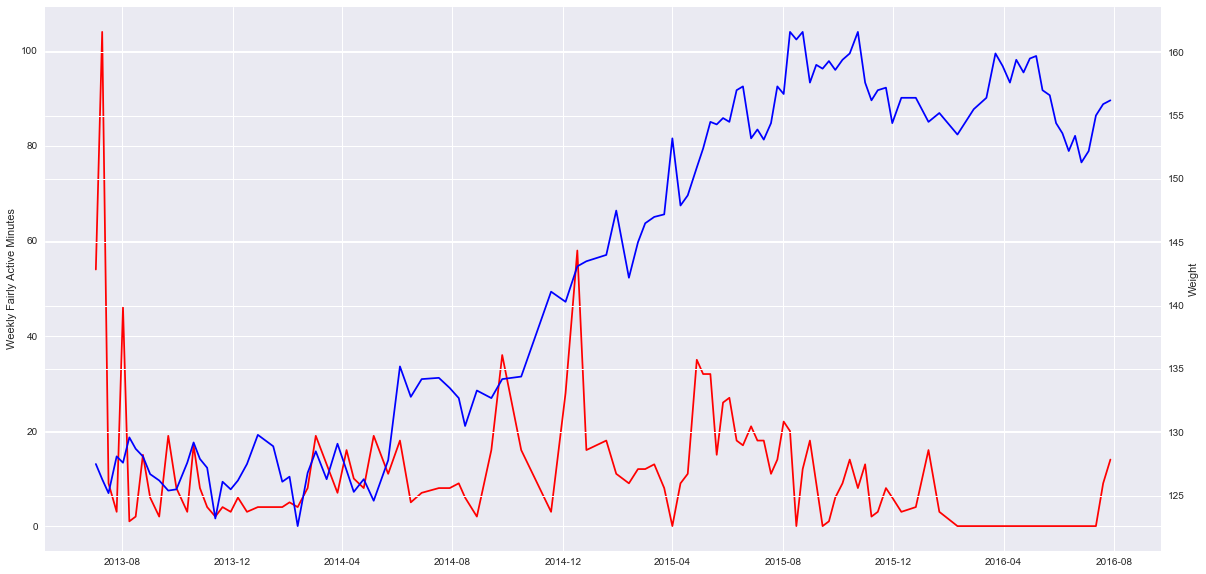

In [95]:
fig, ax1a = plt.subplots(figsize=(20,10))
plot1 = ax1a.plot(df_weight_sum_2['date'],df_weight_sum_2['Weekly_fair_sum'],'r',label='Weekly Fairly Active Minutes')
ax1a.set_ylabel('Weekly Fairly Active Minutes')
ax2a = ax1a.twinx()
plot2 = ax2a.plot(df_weight_sum_2['date'],df_weight_sum_2['weight'], 'b', label='Weight')
ax2a.set_ylabel('Weight')

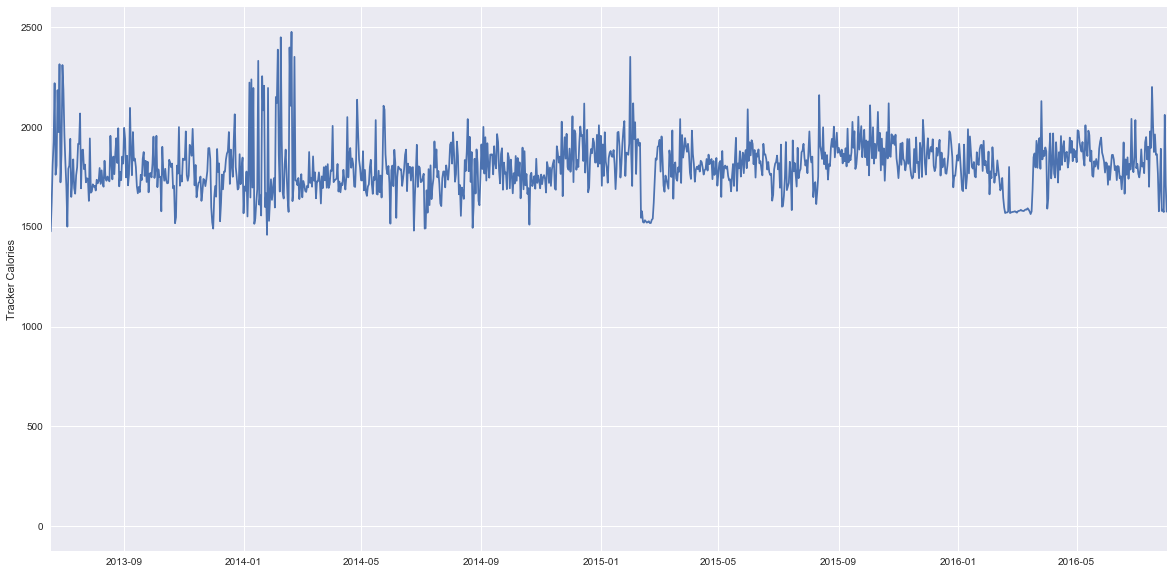

In [91]:
plt.figure(1, figsize=(20,10))
plt.plot(tracker_calories['date'],tracker_calories['Tracker_Calories'])
plt.ylabel('Tracker Calories')
plt.xlim('2013-06-18', '2016-08-01')
plt.show()

In [20]:
df_weight = df_weight.set_index('date')
df_weight = df_weight.drop(['logId','source','time'],axis=1)



In [21]:
df_weight_fat = df_weight['fat'].dropna()


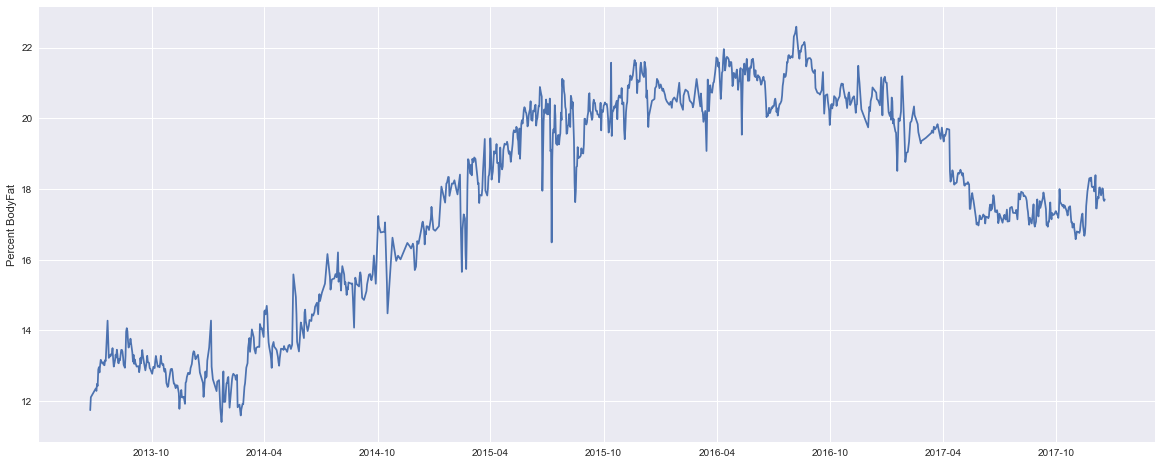

In [22]:
plt.figure(1,figsize=(20,8))
plt.plot(df_weight_fat.index,df_weight_fat)
plt.ylabel('Percent BodyFat')
plt.show()

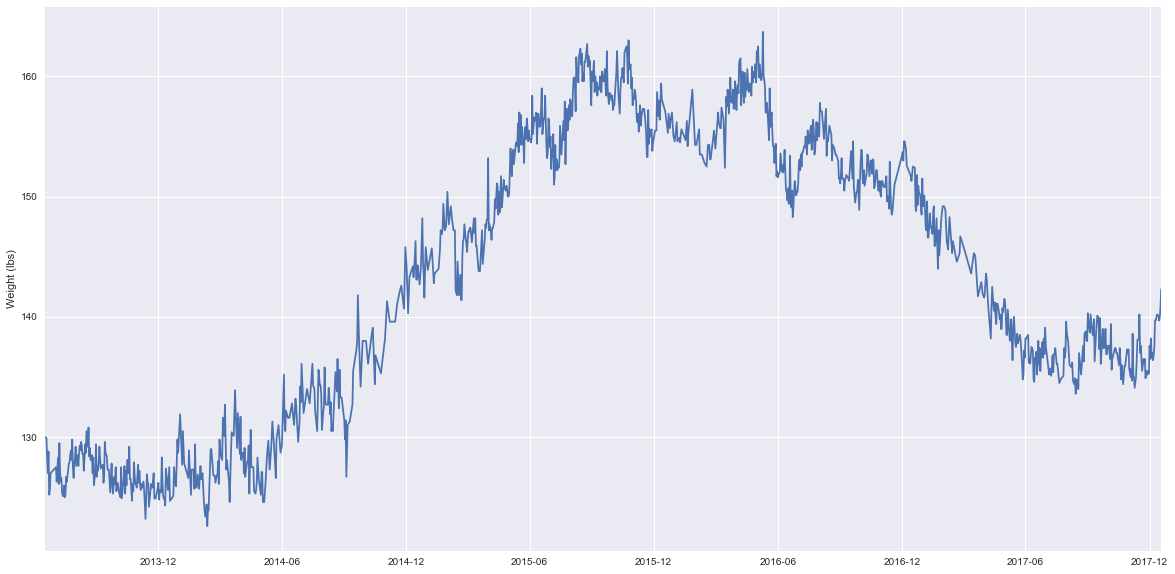

In [23]:
plt.figure(1,figsize=(20,10))
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

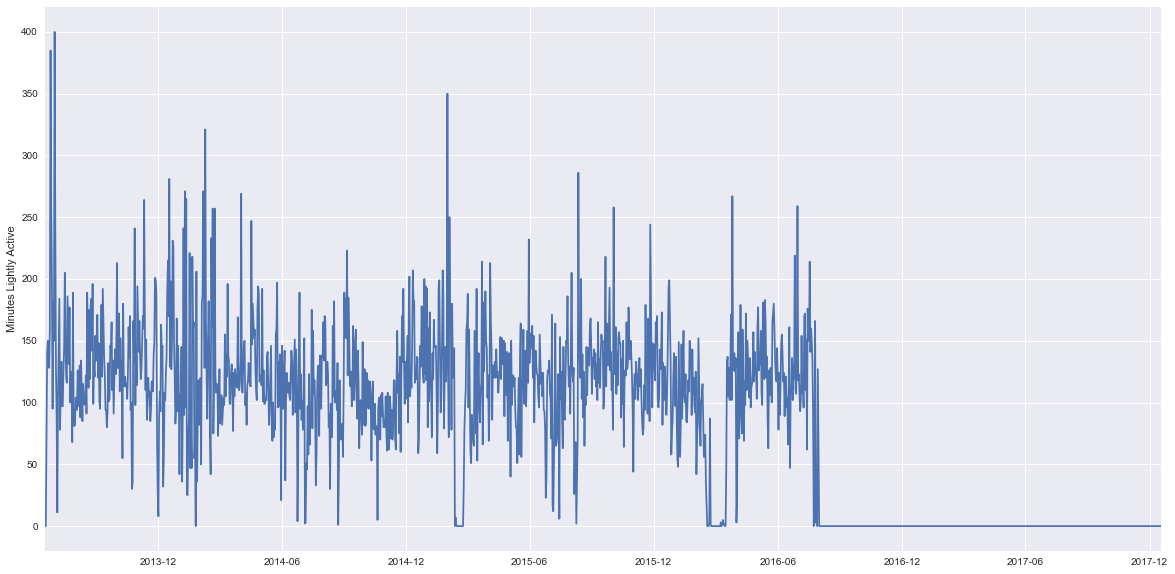

In [24]:
plt.figure(1,figsize=(20,10))
plt.plot(min_light_active.index,min_light_active['light_minutes'])
plt.xlim('2013-06-17', '2017-12-18')
plt.ylabel('Minutes Lightly Active')
plt.show()

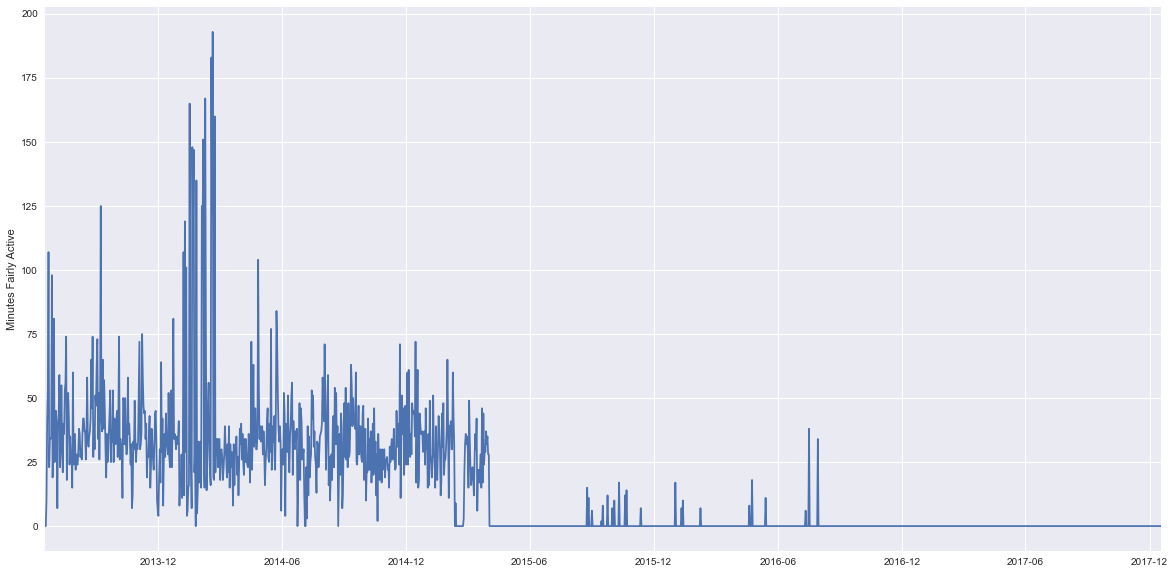

In [25]:
plt.figure(1,figsize=(20,10))
plt.plot(min_fairly_active.index,min_fairly_active['fair_minutes'])
plt.ylabel('Minutes Fairly Active')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

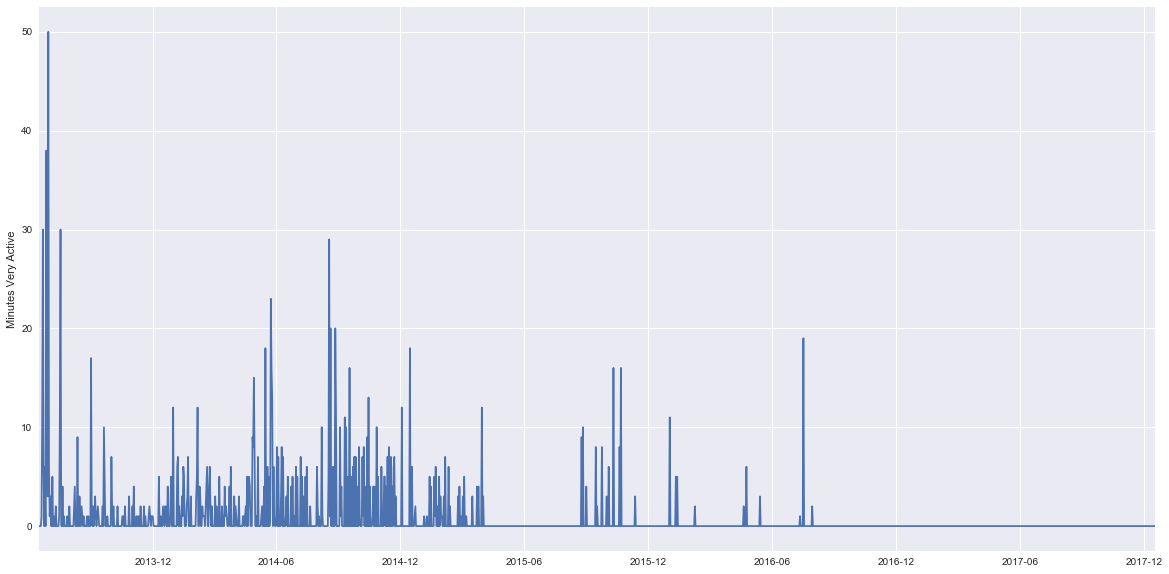

In [26]:
plt.figure(1,figsize=(20,10))
plt.plot(min_very_active.index,min_very_active['very_minutes'])
plt.ylabel('Minutes Very Active')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

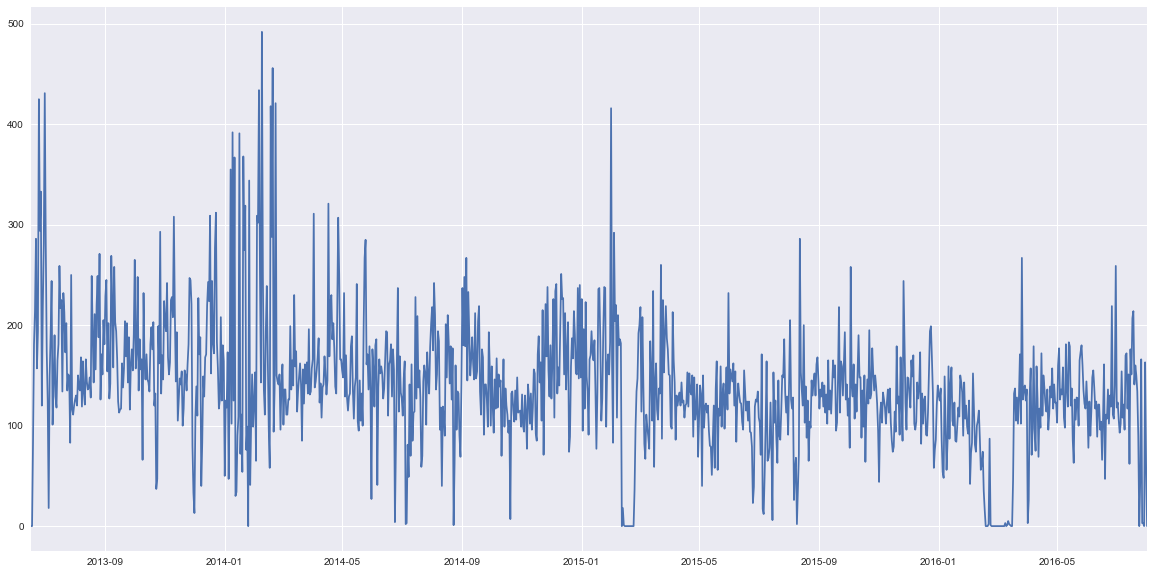

In [28]:
plt.figure(1,figsize=(20,10))
plt.plot(min_active_total.index,min_active_total['Total_minutes'])
plt.xlim('2013-06-17', '2016-08-01')
plt.show()

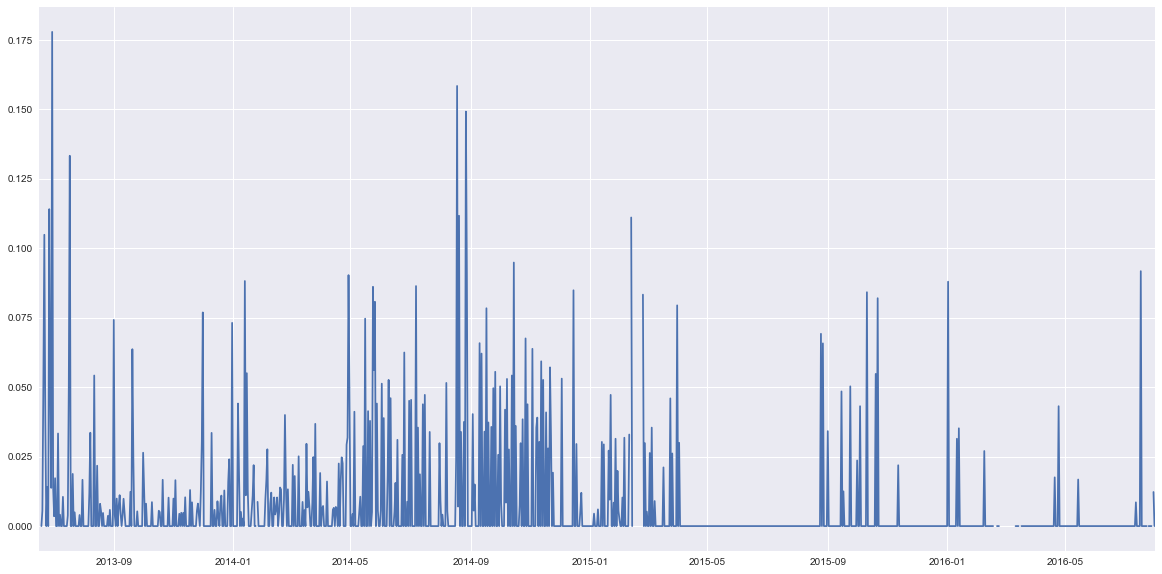

In [29]:
plt.figure(1,figsize=(20,10))
plt.plot(min_active_total.index,min_active_total['Percent Very Active'])
plt.xlim('2013-06-17', '2016-08-01')
plt.show()

In [31]:
min_active_total['Active_Day'] = min_active_total['Total_minutes'].map(lambda minute : 1 if minute >= 75 else 0)
min_active_total

light_minutes  fair_minutes  very_minutes  Total_minutes  \
date                                                                   
2013-01-01              0             0             0              0   
2013-01-02              0             0             0              0   
2013-01-03              0             0             0              0   
2013-01-04              0             0             0              0   
2013-01-05              0             0             0              0   
2013-01-06              0             0             0              0   
2013-01-07              0             0             0              0   
2013-01-08              0             0             0              0   
2013-01-09              0             0             0              0   
2013-01-10              0             0             0              0   
2013-01-11              0             0             0              0   
2013-01-12              0             0             0              0   
2013-01-13              0             0             0              0   
2013-01-14              0             0             0              0   
2013-01-15              0             0             0              0   
2013-01-16              0             0             0              0   
2013-01-17              0             0             0              0   
2013-01-18              0             0             0              0   
2013-01-19              0             0             0              0   
2013-01-20              0             0             0              0   
2013-01-21              0             0             0              0   
2013-01-22              0             0             0              0   
2013-01-23              0             0             0              0   
2013-01-24              0             0             0              0   
2013-01-25              0             0             0              0   
2013-01-26              0             0             0              0   
2013-01-27              0             0             0              0   
2013-01-28              0             0             0              0   
2013-01-29              0             0             0              0   
2013-01-30              0             0             0              0   
...                   ...           ...           ...            ...   
2017-12-02              0             0             0              0   
2017-12-03              0             0             0              0   
2017-12-04              0             0             0              0   
2017-12-05              0             0             0              0   
2017-12-06              0             0             0              0   
2017-12-07              0             0             0              0   
2017-12-08              0             0             0              0   
2017-12-09              0             0             0              0   
2017-12-10              0             0             0              0   
2017-12-11              0             0             0              0   
2017-12-12              0             0             0              0   
2017-12-13              0             0             0              0   
2017-12-14              0             0             0              0   
2017-12-15              0             0             0              0   
2017-12-16              0             0             0              0   
2017-12-17              0             0             0              0   
2017-12-18              0             0             0              0   
2017-12-19              0             0             0              0   
2017-12-20              0             0             0              0   
2017-12-21              0             0             0              0   
2017-12-22              0             0             0              0   
2017-12-23              0             0             0              0   
2017-12-24              0             0             

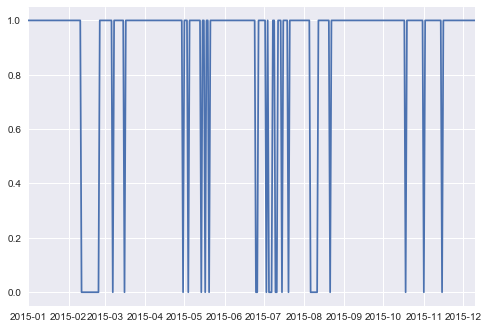

In [32]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])
plt.xlim('2015-01-01', '2015-12-10')
plt.show()

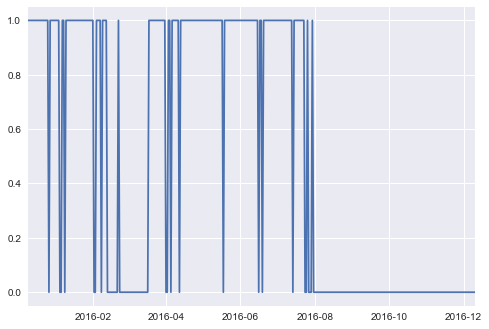

In [33]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])
plt.xlim('2015-12-10', '2016-12-10')
plt.show()

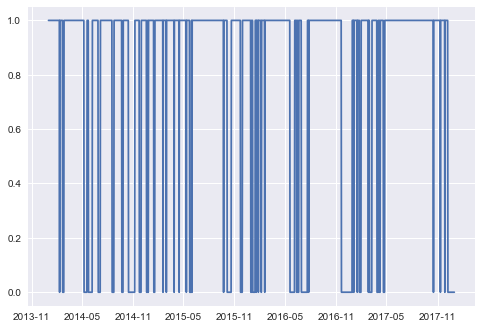

In [36]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])

plt.show()

In [37]:
active_arr = np.array(min_active_total['Active_Day'])
active_arr

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
counts = []
count = 1
for i in range(len(active_arr)-1):
    if active_arr[i] == 1 and active_arr[i+1] == 1:
        count += 1
    elif active_arr[i] == 1 and active_arr[i+1] == 0:
        counts.append(count)
        count = 0
    elif active_arr[i] == 0 and active_arr[i+1] == 1:
        count = 1

        
 

In [39]:
counts

[40,
 10,
 72,
 5,
 21,
 42,
 28,
 19,
 16,
 19,
 1,
 19,
 29,
 11,
 27,
 17,
 25,
 11,
 1,
 113,
 12,
 33,
 30,
 4,
 3,
 7,
 9,
 11,
 90,
 7,
 2,
 9,
 4,
 117,
 3,
 1,
 11,
 7,
 26,
 3,
 18,
 4,
 11,
 175,
 24,
 15,
 10]

In [34]:
tracker_steps_2013 = pd.DataFrame(fit_data_0['tracker-steps']['2013']['activities-tracker-steps'])
tracker_steps_2013['dateTime'] = pd.to_datetime(tracker_steps_2013['dateTime'])
tracker_steps_2013.columns = ['date','tracker-steps']
tracker_steps_2014 = pd.DataFrame(fit_data_0['tracker-steps']['2014']['activities-tracker-steps'])
tracker_steps_2014['dateTime'] = pd.to_datetime(tracker_steps_2014['dateTime'])
tracker_steps_2014.columns = ['date','tracker-steps']
tracker_steps_2015 = pd.DataFrame(fit_data_0['tracker-steps']['2015']['activities-tracker-steps'])
tracker_steps_2015['dateTime'] = pd.to_datetime(tracker_steps_2015['dateTime'])
tracker_steps_2015.columns = ['date','tracker-steps']
tracker_steps_2016 = pd.DataFrame(fit_data_0['tracker-steps']['2016']['activities-tracker-steps'])
tracker_steps_2016['dateTime'] = pd.to_datetime(tracker_steps_2016['dateTime'])
tracker_steps_2016.columns = ['date','tracker-steps']
tracker_steps_2017 = pd.DataFrame(fit_data_0['tracker-steps']['2017']['activities-tracker-steps'])
tracker_steps_2017['dateTime'] = pd.to_datetime(tracker_steps_2017['dateTime'])
tracker_steps_2017.columns = ['date','tracker-steps']

In [35]:
tracker_steps = pd.concat([tracker_steps_2013,tracker_steps_2014,tracker_steps_2015,tracker_steps_2016,tracker_steps_2017])
tracker_steps['tracker-steps'] = tracker_steps['tracker-steps'].astype(int)
tracker_steps = tracker_steps.set_index('date')

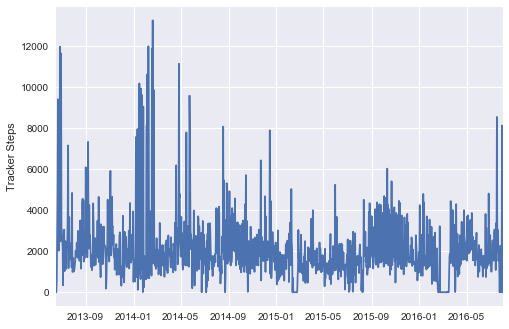

In [36]:
plt.plot(tracker_steps.index,tracker_steps['tracker-steps'])
plt.xlim('2013-06-18', '2016-08-01')
plt.ylabel('Tracker Steps')
plt.show()

In [37]:
tracker_floors_2013 = pd.DataFrame(fit_data_0['tracker-floors']['2013']['activities-tracker-floors'])
tracker_floors_2013['dateTime'] = pd.to_datetime(tracker_floors_2013['dateTime'])
tracker_floors_2013.columns = ['date','tracker-floors']
tracker_floors_2014 = pd.DataFrame(fit_data_0['tracker-floors']['2014']['activities-tracker-floors'])
tracker_floors_2014['dateTime'] = pd.to_datetime(tracker_floors_2014['dateTime'])
tracker_floors_2014.columns = ['date','tracker-floors']
tracker_floors_2015 = pd.DataFrame(fit_data_0['tracker-floors']['2015']['activities-tracker-floors'])
tracker_floors_2015['dateTime'] = pd.to_datetime(tracker_floors_2015['dateTime'])
tracker_floors_2015.columns = ['date','tracker-floors']
tracker_floors_2016 = pd.DataFrame(fit_data_0['tracker-floors']['2016']['activities-tracker-floors'])
tracker_floors_2016['dateTime'] = pd.to_datetime(tracker_floors_2016['dateTime'])
tracker_floors_2016.columns = ['date','tracker-floors']
tracker_floors_2017 = pd.DataFrame(fit_data_0['tracker-floors']['2017']['activities-tracker-floors'])
tracker_floors_2017['dateTime'] = pd.to_datetime(tracker_floors_2017['dateTime'])
tracker_floors_2017.columns = ['date','tracker-floors']

In [38]:
tracker_floors = pd.concat([tracker_floors_2013,tracker_floors_2014,tracker_floors_2015,tracker_floors_2016,tracker_floors_2017])
tracker_floors['tracker-floors'] = tracker_floors['tracker-floors'].astype(int)
tracker_floors = tracker_floors.set_index('date')

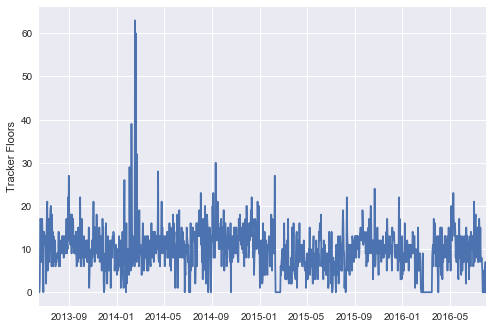

In [39]:
plt.plot(tracker_floors.index,tracker_floors['tracker-floors'])
plt.xlim('2013-06-18', '2016-08-01')
plt.ylabel('Tracker Floors')
plt.show()

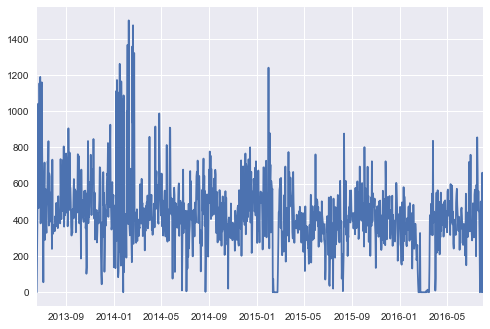

In [42]:
plt.plot(tracker_act_calories['date'],tracker_act_calories['tracker_act_calories'])
plt.xlim('2013-06-18', '2016-08-01')
plt.show()

In [43]:
tracker_act_calories = tracker_act_calories.set_index('date')
tracker_calories = tracker_calories.set_index('date')

In [44]:
tracker_cal_tot = pd.concat([tracker_calories,tracker_act_calories], axis=1)

In [45]:
tracker_cal_tot['ratio'] = (tracker_cal_tot['tracker_act_calories']/tracker_cal_tot['Tracker_Calories'])


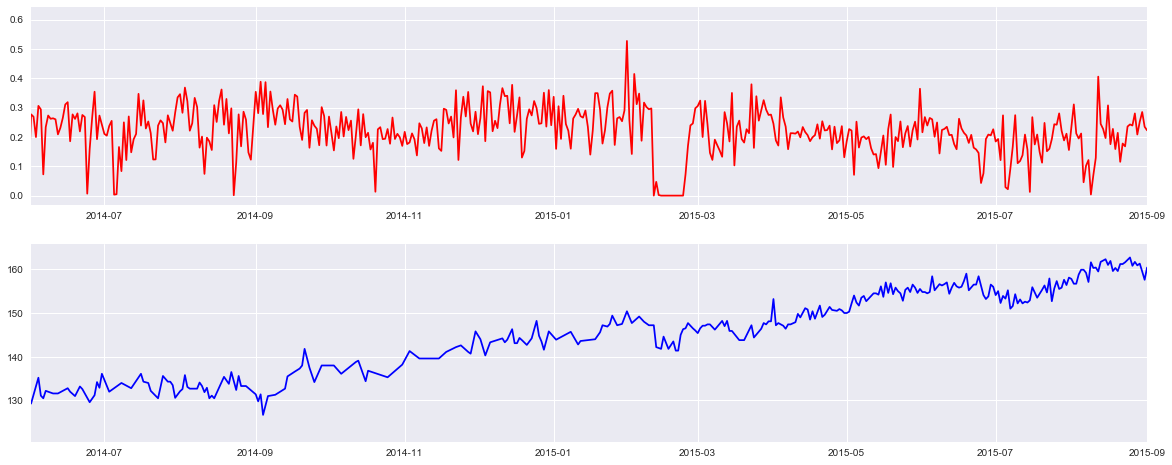

In [46]:
plt.figure(1, figsize=(20,8))
plt.subplot(211)
plt.plot(tracker_cal_tot.index,tracker_cal_tot['ratio'],'r')
plt.xlim('06-01-2014', '09-01-2015')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('06-01-2014', '09-01-2015')
plt.show()

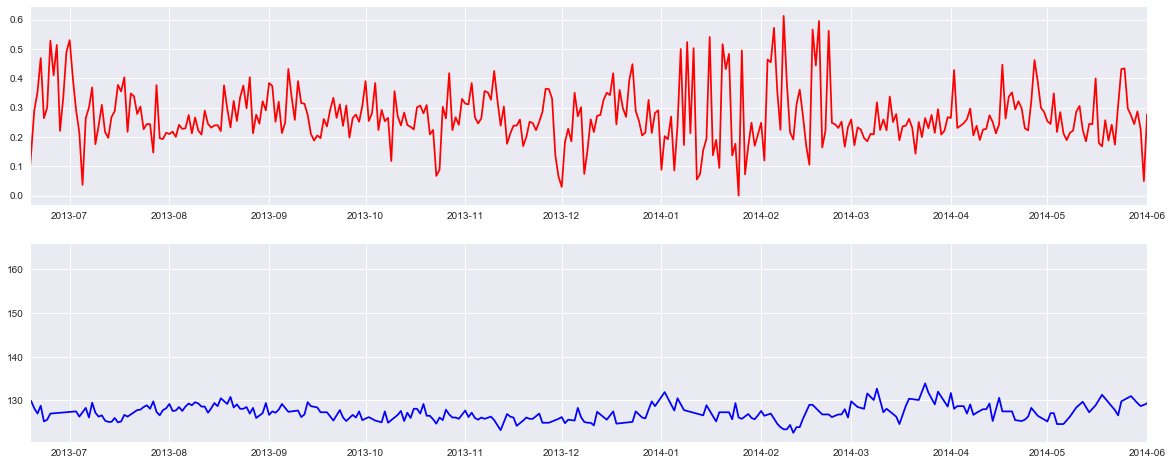

In [47]:
plt.figure(1, figsize=(20,8))
plt.subplot(211)
plt.plot(tracker_cal_tot.index,tracker_cal_tot['ratio'],'r')
plt.xlim('06-19-2013', '06-01-2014')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('06-19-2013', '06-01-2014')
plt.show()

In [48]:
print(tracker_cal_tot.loc['2013-06-19':'2014-06-02']['ratio'].mean())
print(tracker_cal_tot.loc['2013-06-19':'2014-06-02']['ratio'].std())

0.2718829513974986
0.09794210362871426


In [49]:
print(tracker_cal_tot.loc['2014-06-02':'2015-09-01']['ratio'].mean())
print(tracker_cal_tot.loc['2014-06-02':'2015-09-01']['ratio'].std())

0.22103000924556687
0.08295601701122864


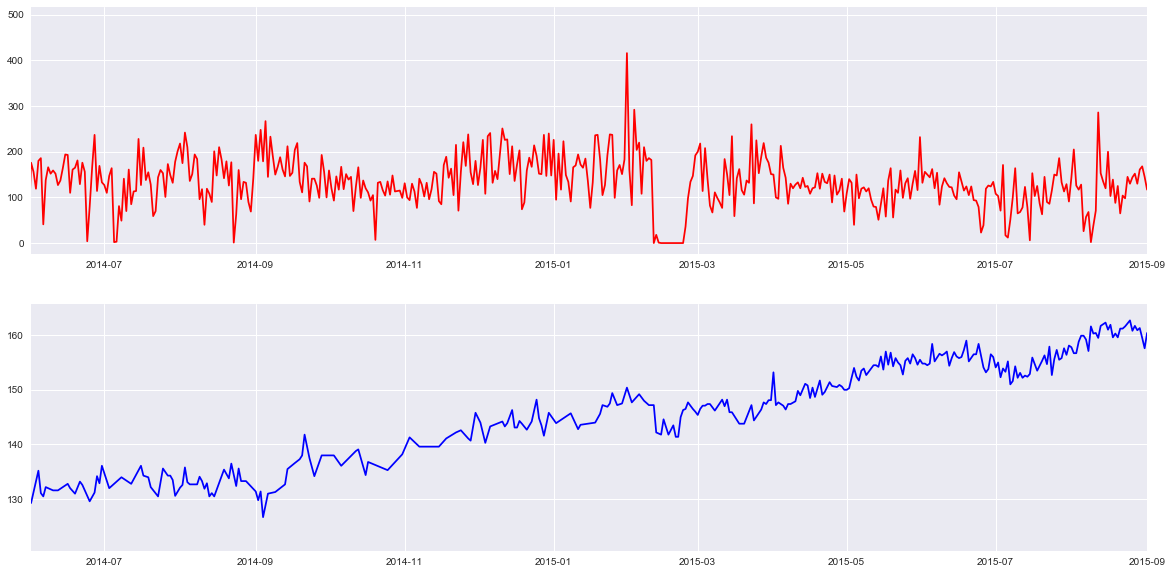

In [50]:
plt.figure(2, figsize=(20,10))
plt.subplot(211)
plt.plot(min_active_total.index,min_active_total['Total_minutes'],'r')
plt.xlim('06-01-2014', '09-01-2015')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('06-01-2014', '09-01-2015')
plt.show()


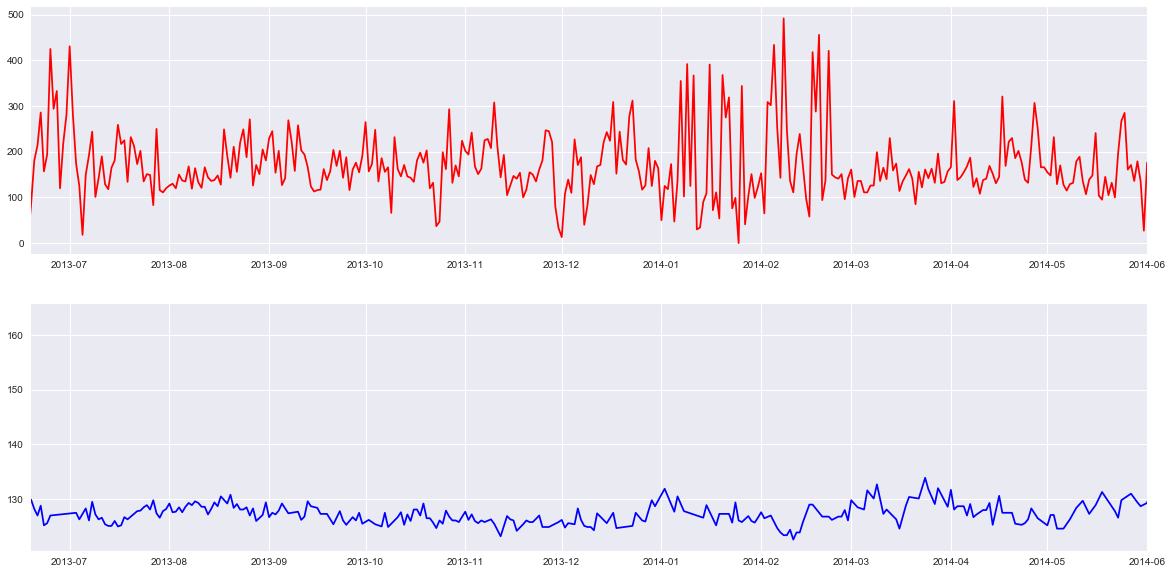

In [52]:
plt.figure(2, figsize=(20,10))
plt.subplot(211)
plt.plot(min_active_total.index,min_active_total['Total_minutes'],'r')
plt.xlim('06-19-2013', '06-01-2014')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('06-19-2013', '06-01-2014')
plt.show()

In [53]:
print(min_active_total.loc['2013-06-19':'2014-06-02']['Total_minutes'].mean())
print(min_active_total.loc['2013-06-19':'2014-06-02']['Total_minutes'].std())


171.53581661891118
74.7897205867059


In [54]:
print(min_active_total.loc['2014-06-02':'2015-09-01']['Total_minutes'].mean())
print(min_active_total.loc['2014-06-02':'2015-09-01']['Total_minutes'].std())

133.8512035010941
55.97218689478952


In [55]:
plt.figure(2, figsize=(20,10))
plt.subplot(211)
plt.plot(df_act_min_change.index,df_act_min_change['Total_minutes'],'r')
plt.xlim('06-18-2013', '08-01-2016')
plt.subplot(212)
plt.plot(df_weight_change.index,df_weight_change['weight'],'b')
plt.xlim('06-18-2013', '08-01-2016')
plt.show()



NameError: name 'df_act_min_change' is not defined

In [56]:
tracker_sed_min_2013 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2013']['activities-tracker-minutesSedentary'])
tracker_sed_min_2013['dateTime'] = pd.to_datetime(tracker_sed_min_2013['dateTime'])
tracker_sed_min_2013.columns = ['date','Sed_Minutes']
tracker_sed_min_2014 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2014']['activities-tracker-minutesSedentary'])
tracker_sed_min_2014['dateTime'] = pd.to_datetime(tracker_sed_min_2014['dateTime'])
tracker_sed_min_2014.columns = ['date','Sed_Minutes']
tracker_sed_min_2015 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2015']['activities-tracker-minutesSedentary'])
tracker_sed_min_2015['dateTime'] = pd.to_datetime(tracker_sed_min_2015['dateTime'])
tracker_sed_min_2015.columns = ['date','Sed_Minutes']
tracker_sed_min_2016 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2016']['activities-tracker-minutesSedentary'])
tracker_sed_min_2016['dateTime'] = pd.to_datetime(tracker_sed_min_2016['dateTime'])
tracker_sed_min_2016.columns = ['date','Sed_Minutes']
tracker_sed_min_2017 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2017']['activities-tracker-minutesSedentary'])
tracker_sed_min_2017['dateTime'] = pd.to_datetime(tracker_sed_min_2017['dateTime'])
tracker_sed_min_2017.columns = ['date','Sed_Minutes']

In [57]:
tracker_sed_min = pd.concat([tracker_sed_min_2013,tracker_sed_min_2014,tracker_sed_min_2015,tracker_sed_min_2016,tracker_sed_min_2017])
tracker_sed_min['Sed_Minutes'] = tracker_sed_min['Sed_Minutes'].astype(int)
tracker_sed_min = tracker_sed_min.set_index('date')

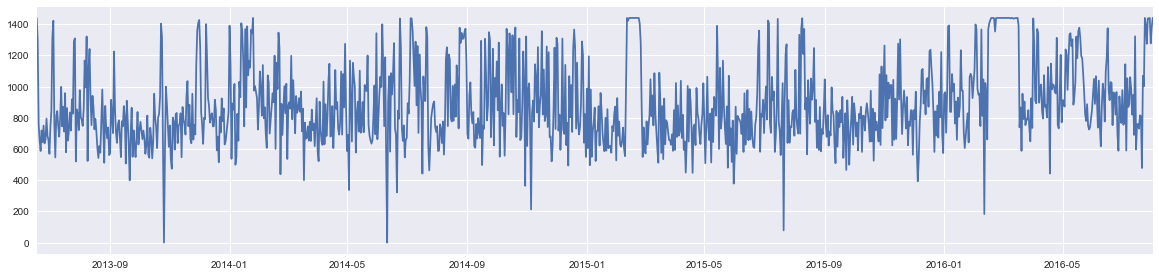

In [58]:
plt.plot(tracker_sed_min.index,tracker_sed_min['Sed_Minutes'])
plt.xlim('06-18-2013','08-01-2016')
plt.show()

In [59]:
min_active_total_new = pd.concat([min_active_total,tracker_sed_min], axis=1)

In [60]:
min_active_total_new['very/sed'] = min_active_total_new['very_minutes']/min_active_total_new['Sed_Minutes']

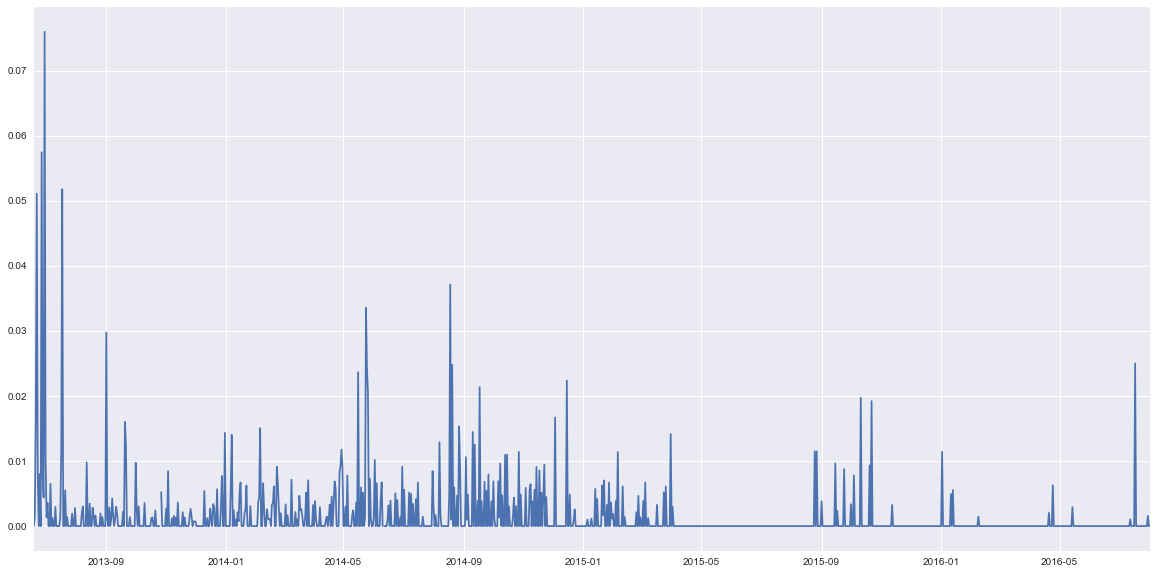

In [67]:
plt.figure(2,figsize=(20,10))
plt.plot(min_active_total_new.index,min_active_total_new['very/sed'])
plt.xlim('06-19-2013','08-01-2016')
plt.show()

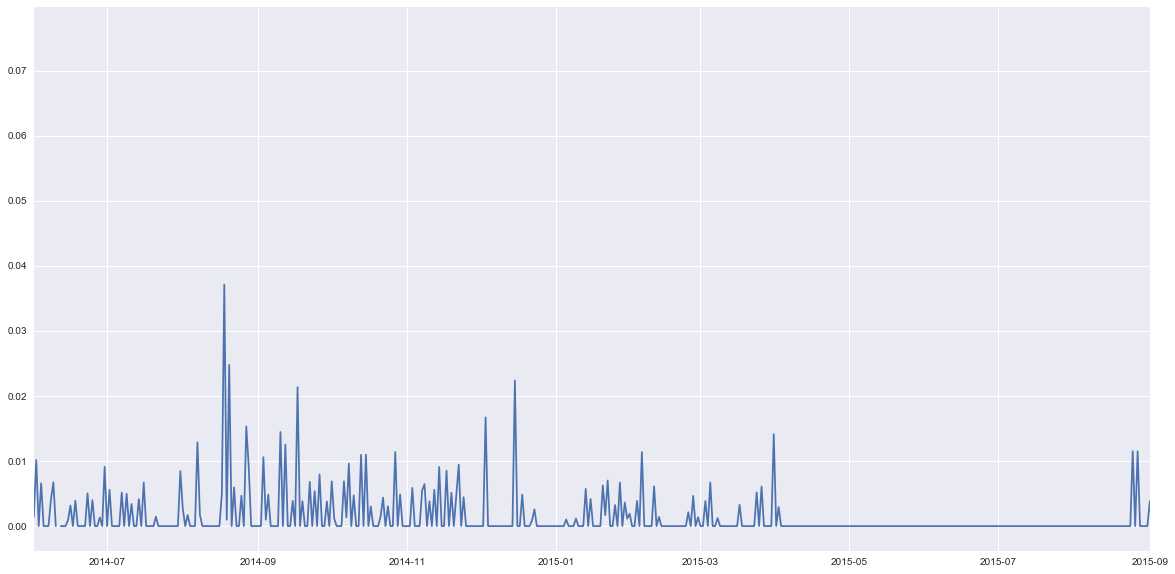

In [66]:
plt.figure(2,figsize=(20,10))
plt.plot(min_active_total_new.index,min_active_total_new['very/sed'])
plt.xlim('06-01-2014','09-01-2015')
plt.show()